# Incarceration Trends Notebook

### Removed columns from csv file before importing.  Columns removed include DCRP stats as they were part of the ASJ/COJ stats, data related to rates, and admissions data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
trendsdf = pd.read_csv('data/incarcerationtrends/incarceration_trends_mod.csv')

In [3]:
trendsdf.head()

,year,state,total_pop,total_pop_15to64,female_pop_15to64,male_pop_15to64,aapi_pop_15to64,black_pop_15to64,latinx_pop_15to64,native_pop_15to64,...,black_female_prison_pop,black_male_prison_pop,latinx_female_prison_pop,latinx_male_prison_pop,native_female_prison_pop,native_male_prison_pop,other_race_female_prison_pop,other_race_male_prison_pop,white_female_prison_pop,white_male_prison_pop
0,1970,AL,24661,14154,7293,6861,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1971,AL,25503,14765,7585,7180,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1972,AL,27156,15939,8168,7771,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1973,AL,28453,16906,8651,8255,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1974,AL,29261,17578,8992,8586,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
trendsdf.shape

(153811, 51)

In [5]:
print(trendsdf.dtypes)

year                              int64
state                            object
total_pop                         int64
total_pop_15to64                  int64
female_pop_15to64                 int64
male_pop_15to64                   int64
aapi_pop_15to64                 float64
black_pop_15to64                float64
latinx_pop_15to64               float64
native_pop_15to64               float64
white_pop_15to64                float64
urbanicity                       object
region                           object
division                         object
total_jail_pop                  float64
female_jail_pop                 float64
male_jail_pop                   float64
female_adult_jail_pop           float64
female_juvenile_jail_pop        float64
male_adult_jail_pop             float64
male_juvenile_jail_pop          float64
aapi_jail_pop                   float64
black_jail_pop                  float64
latinx_jail_pop                 float64
native_jail_pop                 float64


In [6]:
# check for null values
# print(trendsdf.isnull().sum())

In [7]:
# trendsdf['private_jail_flag'].unique()

In [8]:
# convert nan's to 0 for private_jail_flag
trendsdf['private_jail_flag'] = trendsdf['private_jail_flag'].replace(np.nan,0)

In [9]:
# trendsdf['region'].unique()

In [10]:
# trendsdf['division'].unique()

In [11]:
# trendsdf['urbanicity'].unique()

In [12]:
# convert nan's to 'unknown' for 'urbanicity'
trendsdf['urbanicity'] = trendsdf['urbanicity'].replace(np.nan,'unknown')

In [13]:
# change data types of some columns

trendsdf['year'] = trendsdf['year'].astype('str')
trendsdf['state'] = trendsdf['state'].astype('str')
trendsdf['urbanicity'] = trendsdf['urbanicity'].astype('category')
trendsdf['region'] = trendsdf['region'].astype('category')
trendsdf['division'] = trendsdf['division'].astype('category')

In [14]:
# sum the jail and prison populations together

trendsdf['jp_aapi'] = trendsdf['aapi_jail_pop'] + trendsdf['aapi_prison_pop']
trendsdf['jp_black'] = trendsdf['black_jail_pop'] + trendsdf['black_prison_pop']
trendsdf['jp_latinx'] = trendsdf['latinx_jail_pop'] + trendsdf['latinx_prison_pop']
trendsdf['jp_native'] = trendsdf['native_jail_pop'] + trendsdf['native_prison_pop']
trendsdf['jp_white'] = trendsdf['white_jail_pop'] + trendsdf['white_prison_pop']
trendsdf['jp_other'] = trendsdf['other_race_jail_pop'] + trendsdf['other_race_prison_pop']

trendsdf['jp_total'] = trendsdf['total_jail_pop'] + trendsdf['total_prison_pop']

In [15]:
# Creating a smaller subset of trendsdf that contains data for the years 2000 - 2018 only

yearstouse = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
             '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

smalldf = trendsdf[trendsdf['year'].isin(yearstouse)]

In [16]:
# how many entries are there for each year
# smalldf['year'].value_counts()

In [17]:
# smalldf.describe()

In [18]:
# len(smalldf['state'].unique())

In [19]:
# smalldf.groupby(['year','state']).describe()

In [20]:
# set up for graphs.  one year only, includes all states
# year00 = smalldf[(smalldf.year == '2000')]

# year00 = year00[['division', 'jp_aapi', 'jp_black', 'jp_latinx', 'jp_native', 'jp_white', 'jp_other',
#                  'aapi_pop_15to64', 'black_pop_15to64', 'latinx_pop_15to64', 'native_pop_15to64',
#                  'white_pop_15to64']].groupby(['division']).sum()
# year00 = year00.reset_index()
# year00

In [21]:
def annualbarplot_jp(yeartoplot):
    ## create bar plot that shows the combined totals for jail and prison inmate populations for each U.S. 
    ## Division (per U.S. census) for a selected year
    
    # convert year entered to string
    yeartoplot = str(yeartoplot)
    
    # filter dataframe for correct year
    yeardf = smalldf[(smalldf.year == yeartoplot)]
    
    # groupby division to get total amounts
    yeardf = yeardf[['division', 'jp_aapi', 'jp_black', 'jp_latinx', 'jp_native', 'jp_white', 'jp_other',
                     'aapi_pop_15to64', 'black_pop_15to64', 'latinx_pop_15to64', 'native_pop_15to64',
                     'white_pop_15to64']].groupby(['division']).sum()
    
    # reset index
    yeardf = yeardf.reset_index()
    
    
    # Now for the bar chart
    plt.figure(figsize=(10,6))

    labels = yeardf['division']

    # jail populations
    jail1 = yeardf['jp_aapi']
    jail2 = yeardf['jp_black']
    jail3 = yeardf['jp_latinx']
    jail4 = yeardf['jp_native']
    jail5 = yeardf['jp_white']
    jail6 = yeardf['jp_other']

    # width for multiple bar chart
    width = 0.1

    # graph setup
    #plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.xticks(range(len(jail1)), labels, rotation=45)
    plt.xlabel('Division', fontweight='bold')
    plt.ylabel('Population', fontweight='bold')
    plt.title('Jail and Prison Population, Year={}'.format(yeartoplot), fontweight='bold')

    # side-by-side bars
    plt.bar(np.arange(len(jail1)), jail1, width=width, label='aapi')
    plt.bar(np.arange(len(jail2))+width, jail2, width=width, label='black')
    plt.bar(np.arange(len(jail3))+2*width, jail3, width=width, label='latinx')
    plt.bar(np.arange(len(jail4))+3*width, jail4, width=width, label='native')
    plt.bar(np.arange(len(jail5))+4*width, jail5, width=width, label='white')
    plt.bar(np.arange(len(jail6))+5*width, jail6, width=width, label='other')

    plt.legend(loc='best')
    
    plt.savefig('charts/incarceration/{}_jp_pop.png'.format(yeartoplot), bbox_inches='tight')
    
    #plt.show()

In [22]:
# annualbarplot_jp(2000)

In [23]:
def annualbarplot_pop(yeartoplot):
    ### create bar plot that shows populations for each U.S. Division (per U.S. census)
    ### for a selected year
    
    # convert year entered to string
    yeartoplot = str(yeartoplot)
    
    # filter dataframe for correct year
    yeardf = smalldf[(smalldf.year == yeartoplot)]
    
    # groupby division to get total amounts
    yeardf = yeardf[['division', 'jp_aapi', 'jp_black', 'jp_latinx', 'jp_native', 'jp_white', 'jp_other',
                     'aapi_pop_15to64', 'black_pop_15to64', 'latinx_pop_15to64', 'native_pop_15to64',
                     'white_pop_15to64']].groupby(['division']).sum()
    
    # reset index
    yeardf = yeardf.reset_index()
    
    
    # Now for the bar chart
    plt.figure(figsize=(10,6))

    labels = yeardf['division']

    # jail populations
    pop1 = yeardf['aapi_pop_15to64']
    pop2 = yeardf['black_pop_15to64']
    pop3 = yeardf['latinx_pop_15to64']
    pop4 = yeardf['native_pop_15to64']
    pop5 = yeardf['white_pop_15to64']
    # pop6 = yeardf['jp_other']

    # width for multiple bar chart
    width = 0.1

    # graph setup
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(range(len(pop1)), labels, rotation=45)
    plt.xlabel('Division', fontweight='bold')
    plt.ylabel('Population', fontweight='bold')
    plt.title('U.S. Population, Year={}'.format(yeartoplot), fontweight='bold')

    # side-by-side bars
    plt.bar(np.arange(len(pop1)), pop1, width=width, label='aapi')
    plt.bar(np.arange(len(pop2))+width, pop2, width=width, label='black')
    plt.bar(np.arange(len(pop3))+2*width, pop3, width=width, label='latinx')
    plt.bar(np.arange(len(pop4))+3*width, pop4, width=width, label='native')
    plt.bar(np.arange(len(pop5))+4*width, pop5, width=width, label='white')
    # plt.bar(np.arange(len(pop6))+5*width, pop6, width=width, label='other')

    plt.legend(loc='best')
    
    plt.savefig('charts/incarceration/{}_us_pop.png'.format(yeartoplot), bbox_inches='tight')
    
    #plt.show()

In [24]:
# annualbarplot_pop(2000)

In [25]:
# prepping dataframe for the statelineplot function in next cell

statedf = smalldf[['state', 'year', 'jp_aapi', 'jp_black', 'jp_latinx', 'jp_native', 'jp_white', 'jp_other',
                  'aapi_pop_15to64', 'black_pop_15to64', 'latinx_pop_15to64', 'native_pop_15to64', 
                   'white_pop_15to64']].groupby(['state', 'year']).sum()

statedf = statedf.reset_index()

# statedf

In [26]:
def statelineplot(state):
    ## create line plot that shows how the combined jail and prison populations have changed over the years
    ## for a selected state
    
    # filter dataframe for correct year
    statelinesdf = statedf[(statedf.state == state)]
    
    # Now for the bar chart
    plt.figure(figsize=(10,6))

    # graph setup
    plt.ticklabel_format(style='plain', axis='y')
    plt.xlabel('Year', fontweight='bold')
    plt.ylabel('Population', fontweight='bold')
    plt.title('{} Jail and Prison Population'.format(state), fontweight='bold')
    
    # 'jp_aapi', 'jp_black', 'jp_latinx', 'jp_native', 'jp_white', 'jp_other'
    
    plt.plot(statelinesdf['year'], statelinesdf['jp_aapi'], label='aapi')
    plt.plot(statelinesdf['year'], statelinesdf['jp_black'], label='black')
    plt.plot(statelinesdf['year'], statelinesdf['jp_latinx'], label='latinx')
    plt.plot(statelinesdf['year'], statelinesdf['jp_native'], label='native')
    plt.plot(statelinesdf['year'], statelinesdf['jp_white'], label='white')
    plt.plot(statelinesdf['year'], statelinesdf['jp_other'], label='other')
    

    plt.legend(loc='best')
    
    plt.savefig('charts/incarceration/{}_jp_pop.png'.format(state), bbox_inches='tight')
    
    #plt.show()

In [27]:
## prep dataframe for the 'totlineplot' function in the next cell

totdf = smalldf[['state', 'year', 'jp_total', 'total_pop']].groupby(['state','year']).sum()

totdf = totdf.reset_index()

# totdf

In [28]:
def totlineplot(state):
    ### plot the total jail and prison populations (for selected state), not broken down by race/ethnicity, 
    ### because of the states that showed no populations per race/ethnicity
    
    # filter dataframe for correct year
    totlinesdf = totdf[(totdf.state == state)]
    
    # Now for the bar chart
    plt.figure(figsize=(10,6))

    # graph setup
    plt.ticklabel_format(style='plain', axis='y')
    plt.xlabel('Year', fontweight='bold')
    plt.ylabel('Population', fontweight='bold')
    plt.title('{} Total Jail and Prison Population'.format(state), fontweight='bold')
    
    # 'jp_aapi', 'jp_black', 'jp_latinx', 'jp_native', 'jp_white', 'jp_other'
    
    plt.plot(totlinesdf['year'], totlinesdf['jp_total'], label='j&p total')
    # plt.plot(totlinesdf['year'], totlinesdf['total_pop'], label='population total')

    plt.legend(loc='best')
    
    plt.savefig('charts/incarceration/total_{}_pop.png'.format(state), bbox_inches='tight')
    
    #plt.show()

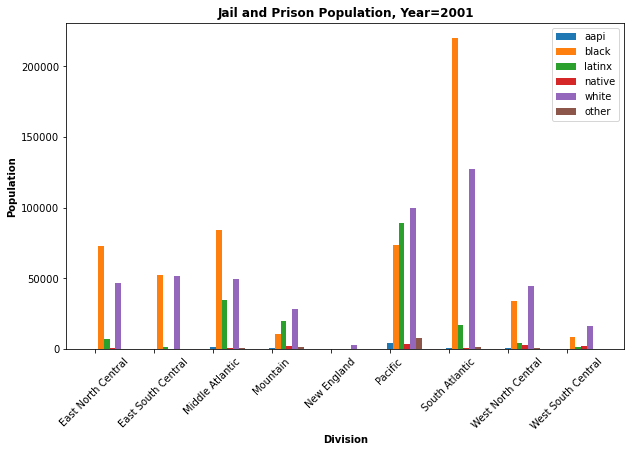

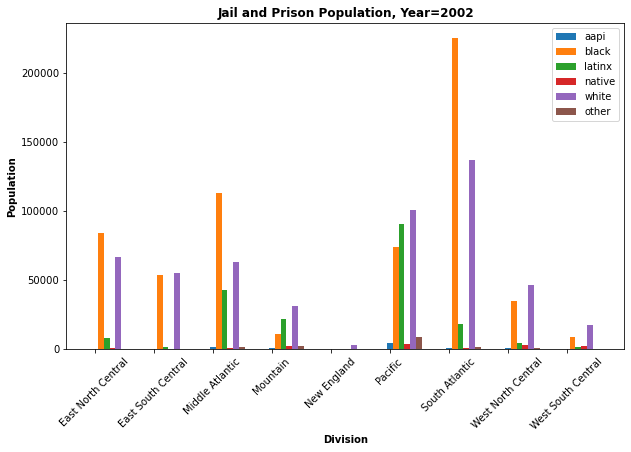

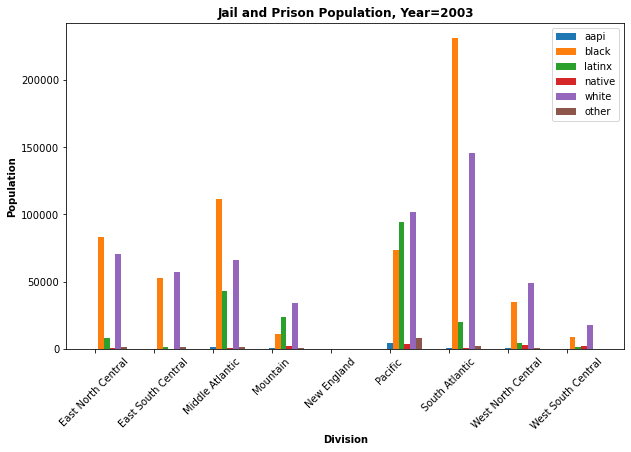

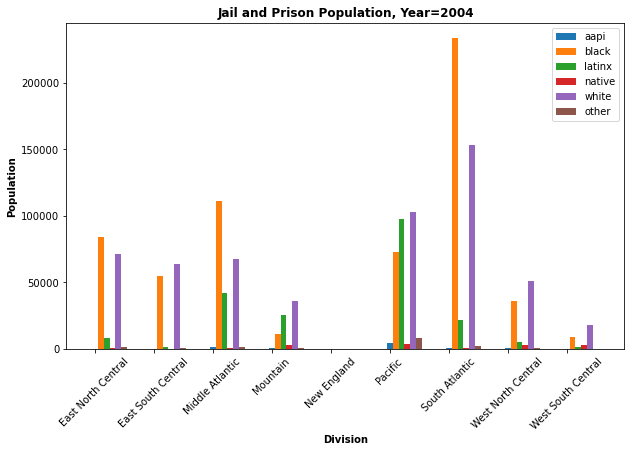

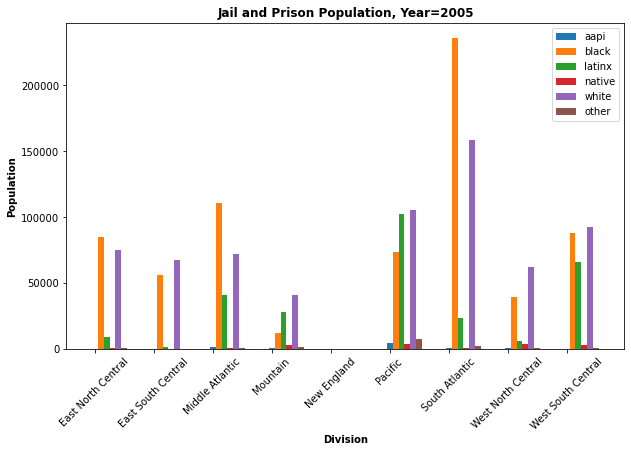

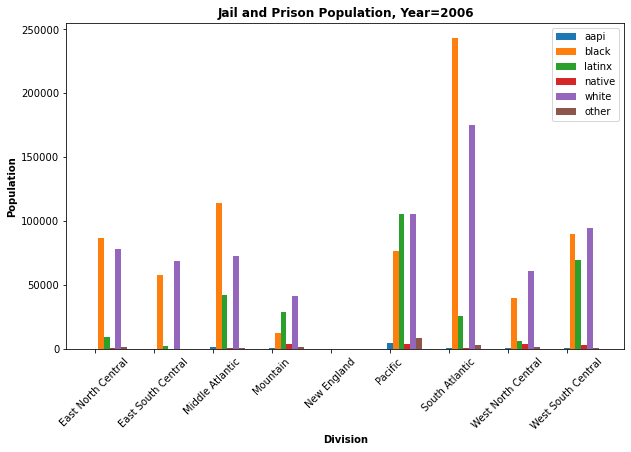

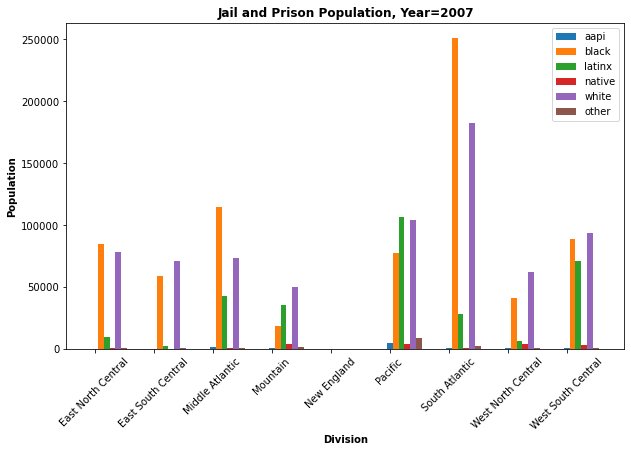

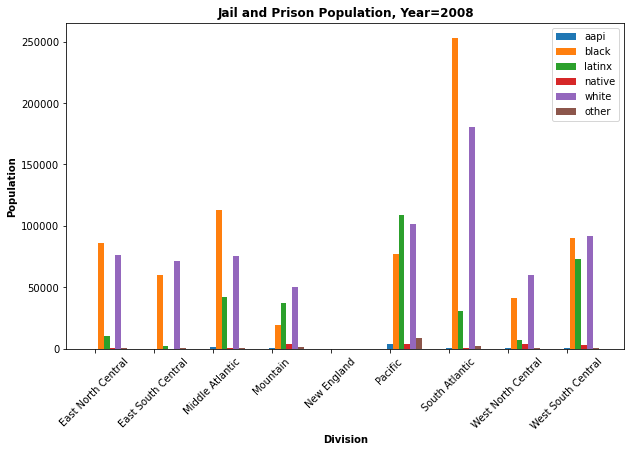

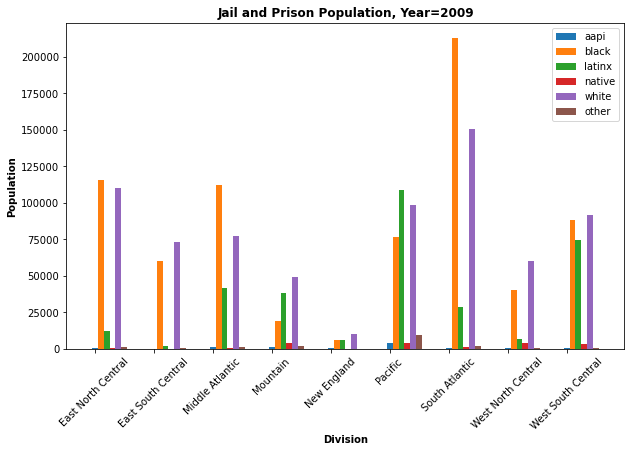

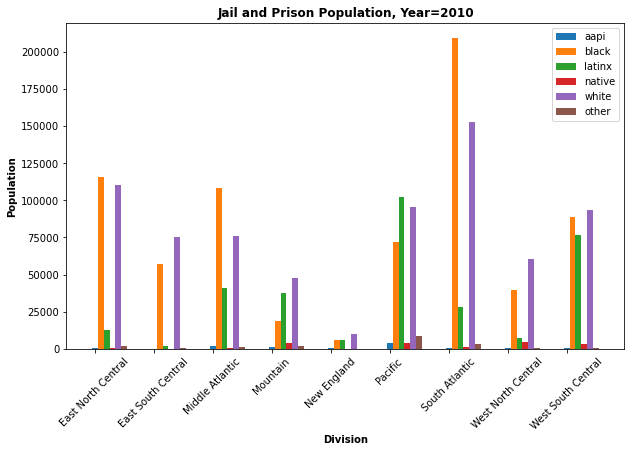

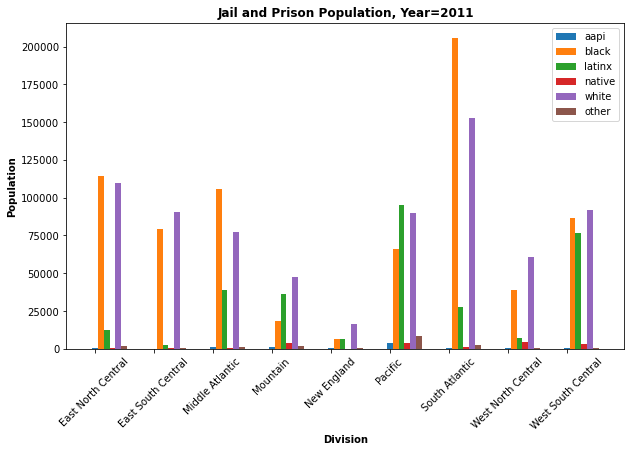

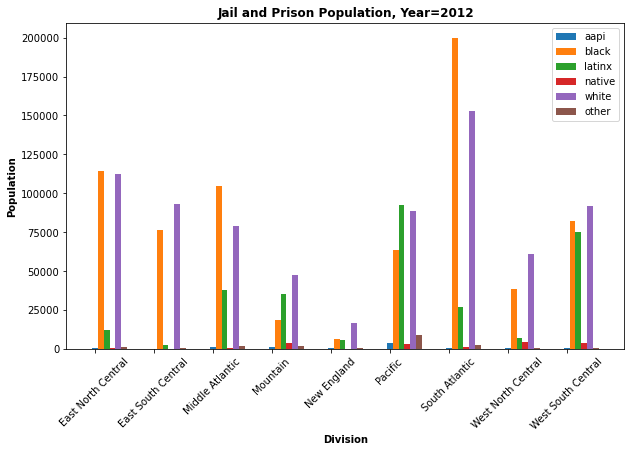

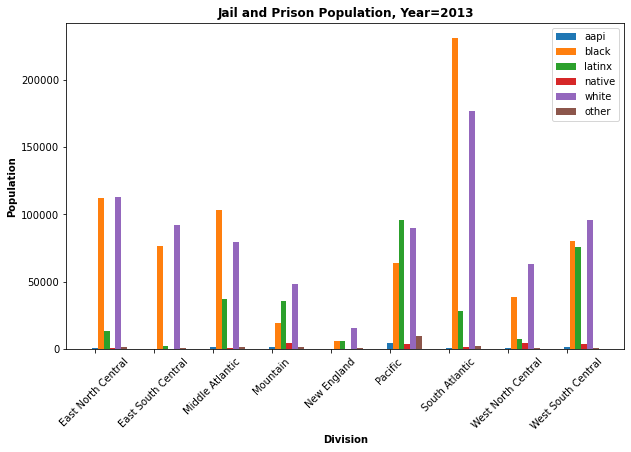

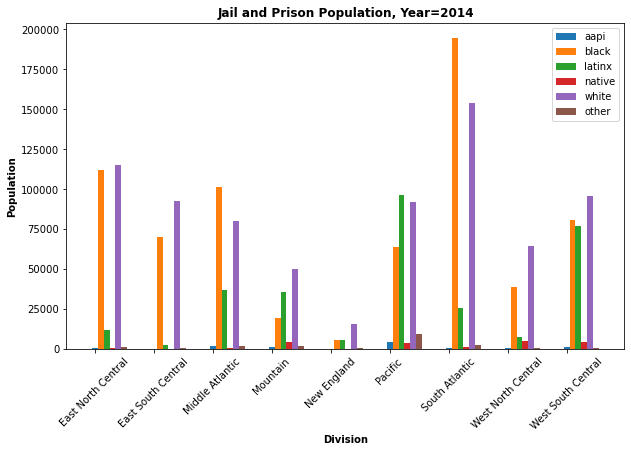

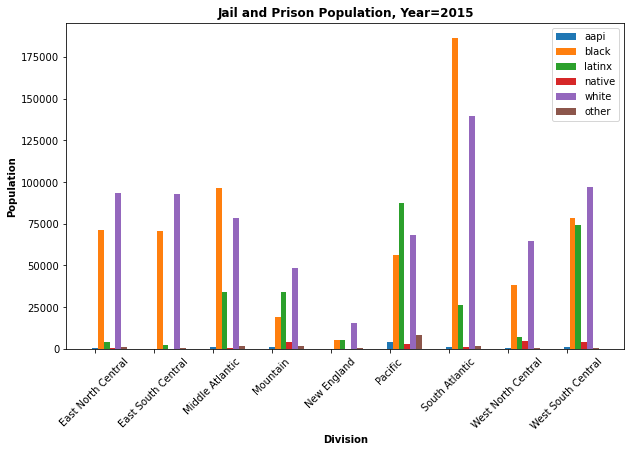

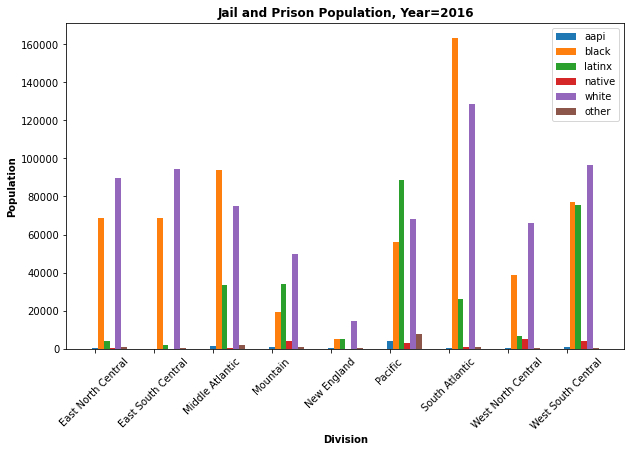

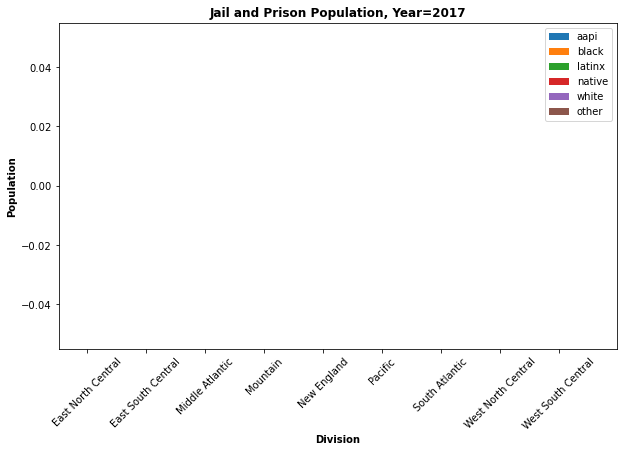

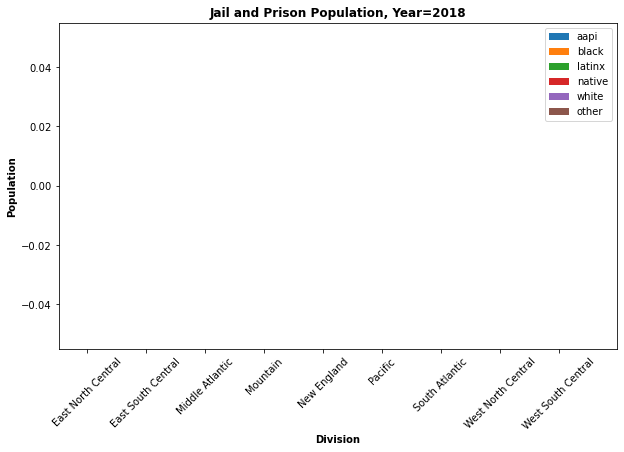

In [29]:
annualbarplot_jp(2001)
annualbarplot_jp(2002)
annualbarplot_jp(2003)
annualbarplot_jp(2004)
annualbarplot_jp(2005)
annualbarplot_jp(2006)
annualbarplot_jp(2007)
annualbarplot_jp(2008)
annualbarplot_jp(2009)
annualbarplot_jp(2010)
annualbarplot_jp(2011)
annualbarplot_jp(2012)
annualbarplot_jp(2013)
annualbarplot_jp(2014)
annualbarplot_jp(2015)
annualbarplot_jp(2016)
annualbarplot_jp(2017)
annualbarplot_jp(2018)

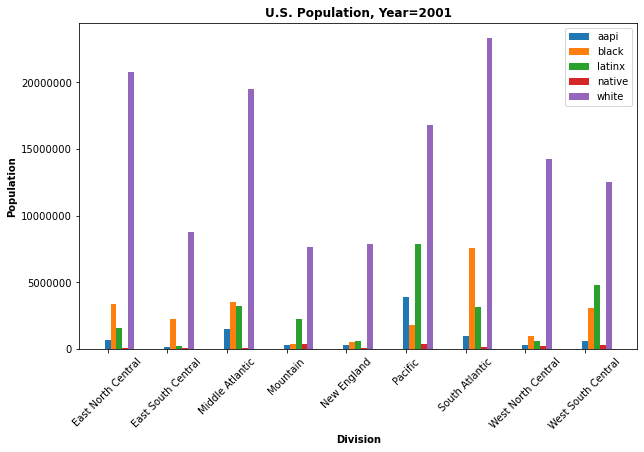

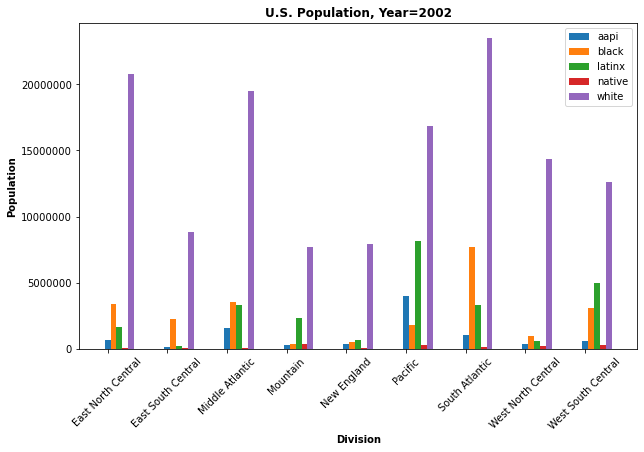

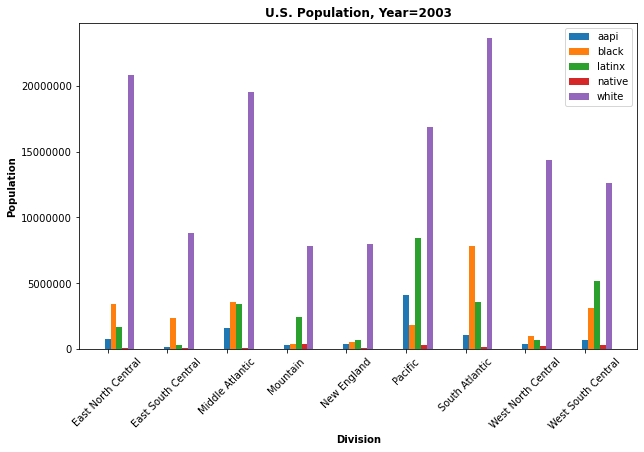

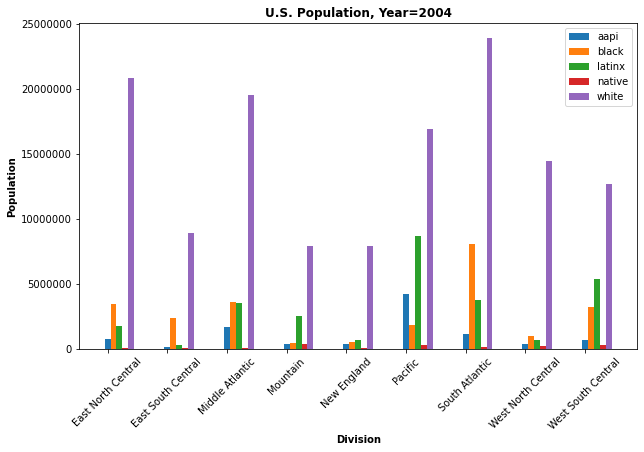

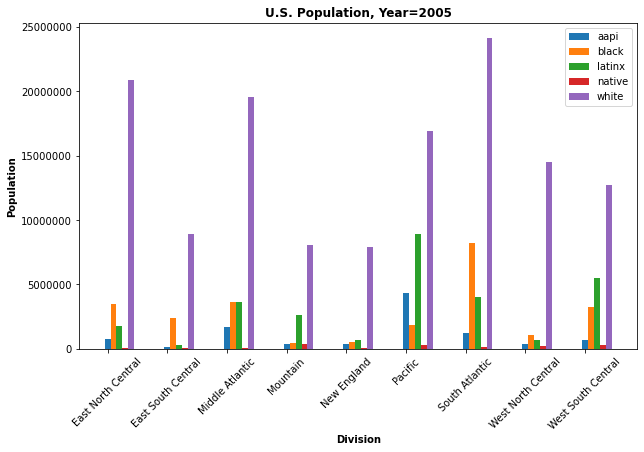

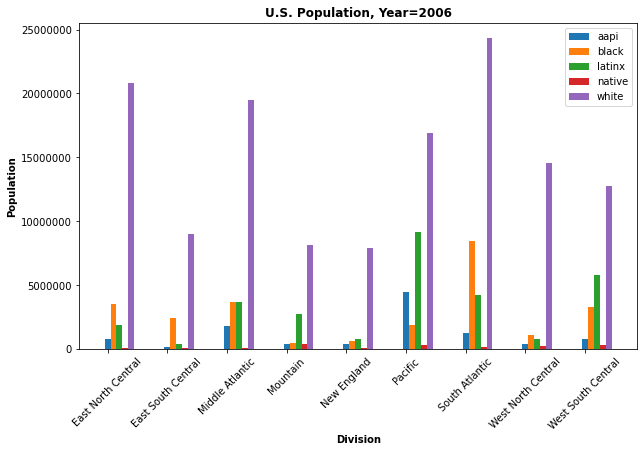

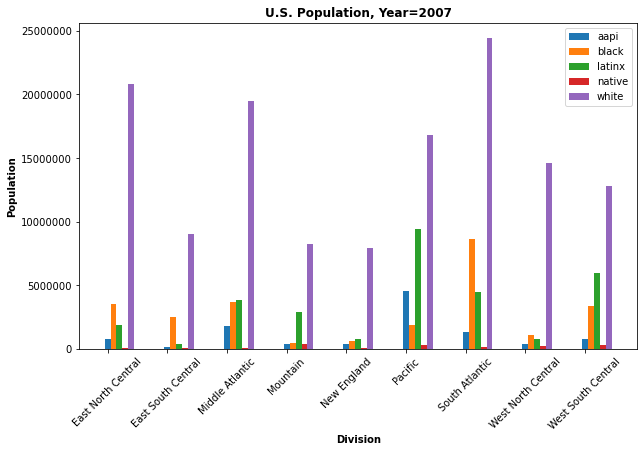

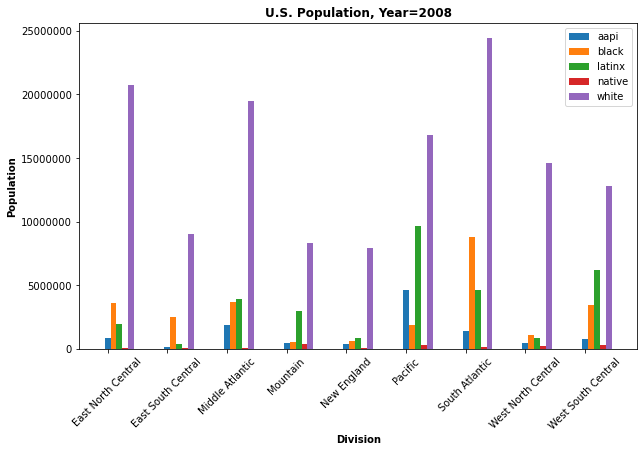

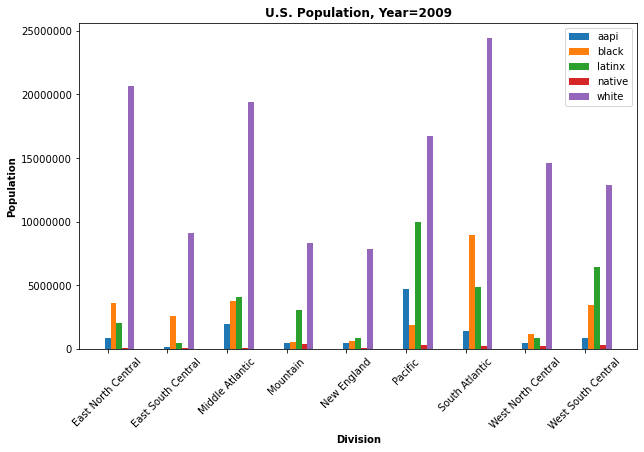

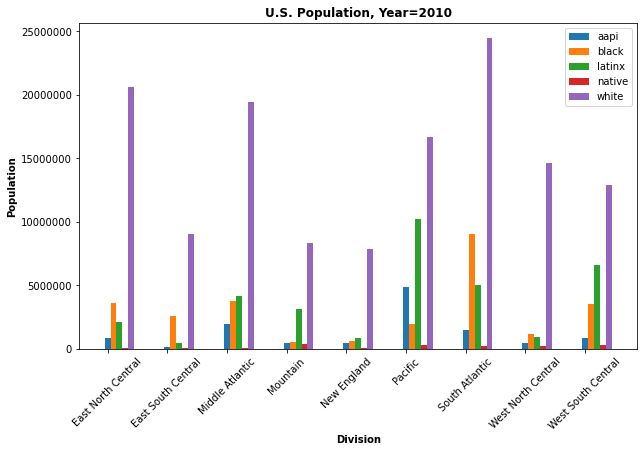

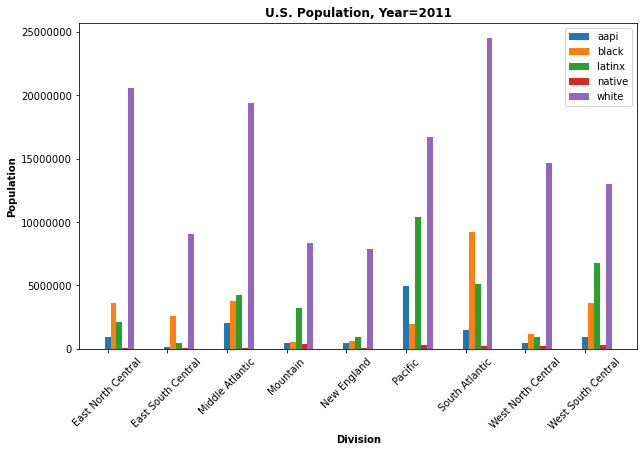

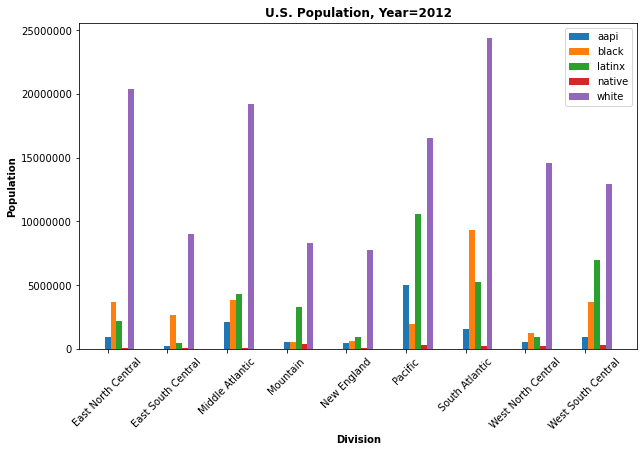

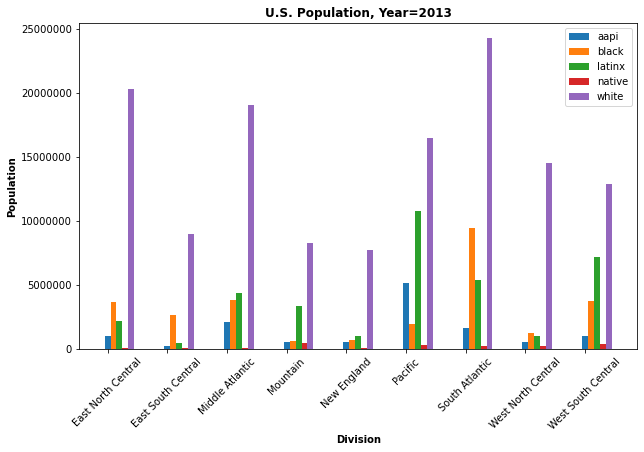

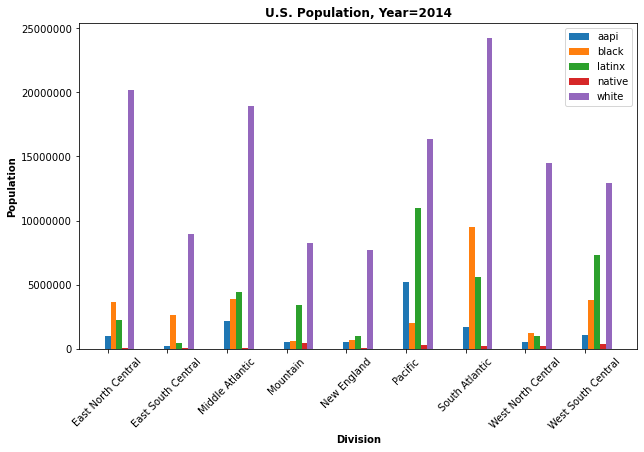

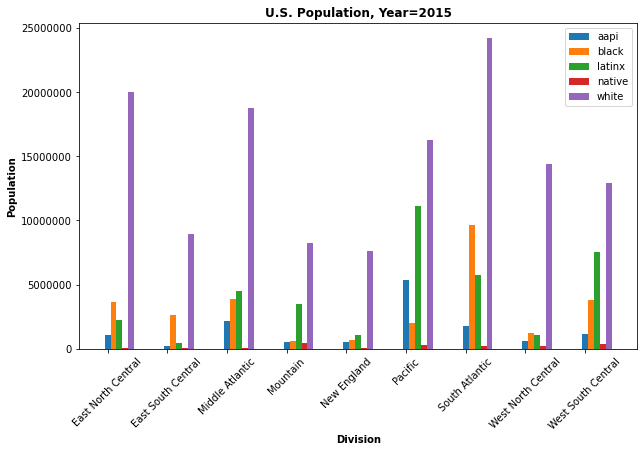

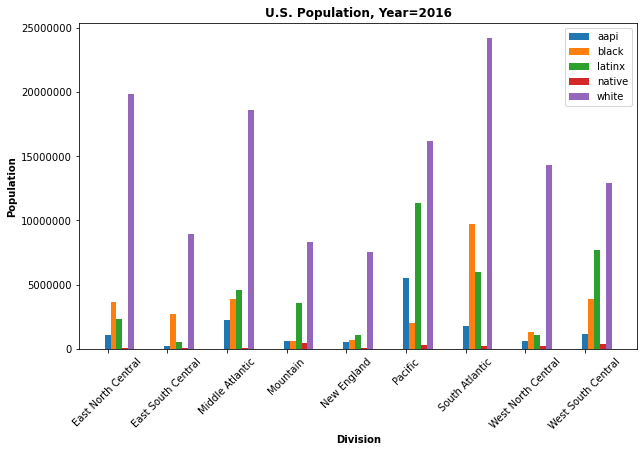

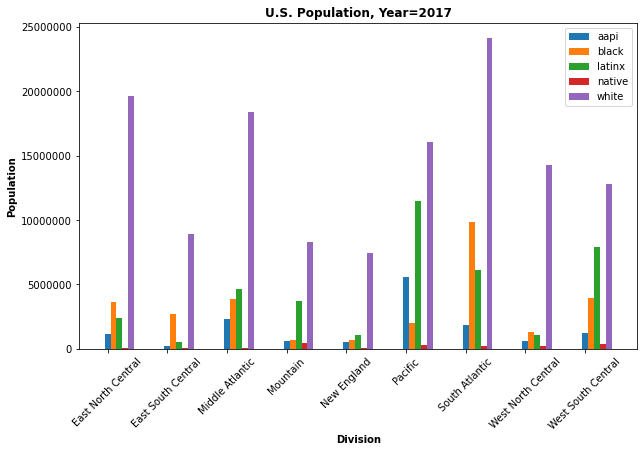

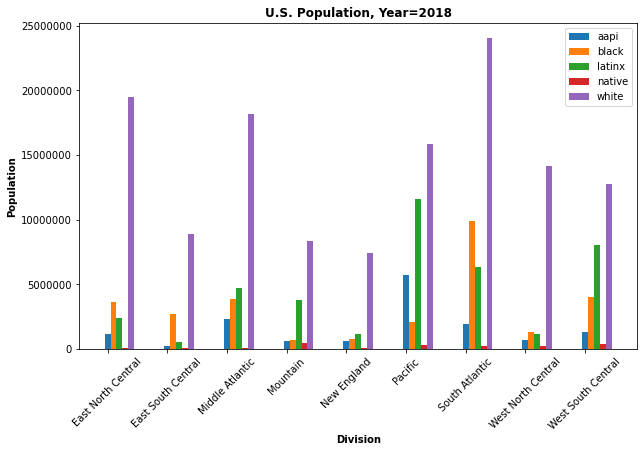

In [30]:
annualbarplot_pop(2001)
annualbarplot_pop(2002)
annualbarplot_pop(2003)
annualbarplot_pop(2004)
annualbarplot_pop(2005)
annualbarplot_pop(2006)
annualbarplot_pop(2007)
annualbarplot_pop(2008)
annualbarplot_pop(2009)
annualbarplot_pop(2010)
annualbarplot_pop(2011)
annualbarplot_pop(2012)
annualbarplot_pop(2013)
annualbarplot_pop(2014)
annualbarplot_pop(2015)
annualbarplot_pop(2016)
annualbarplot_pop(2017)
annualbarplot_pop(2018)

<ipython-input-26-bb886dba079e>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,6))


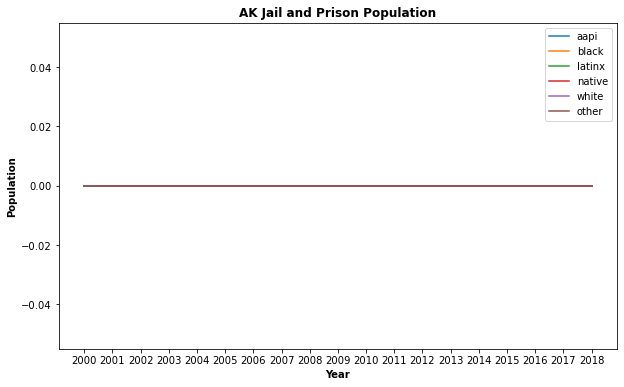

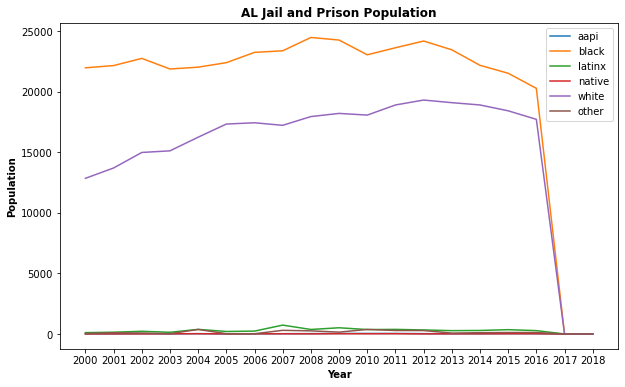

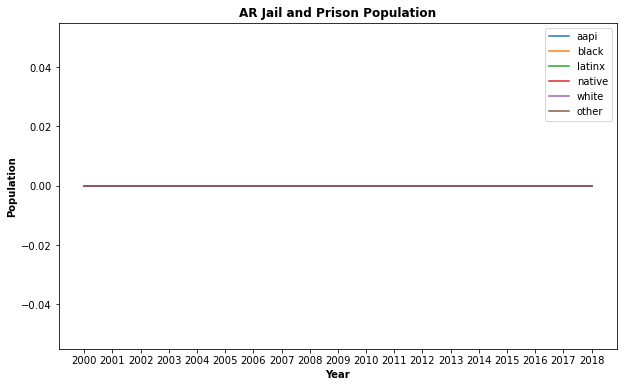

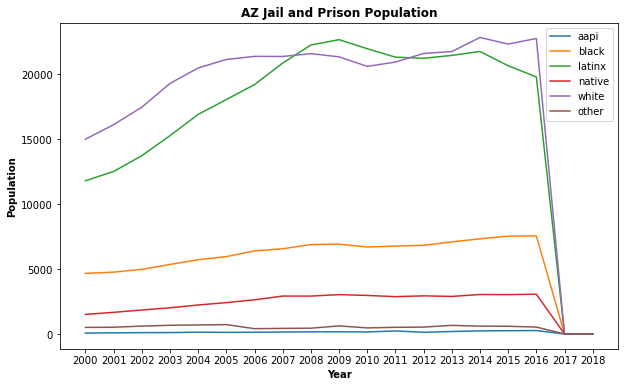

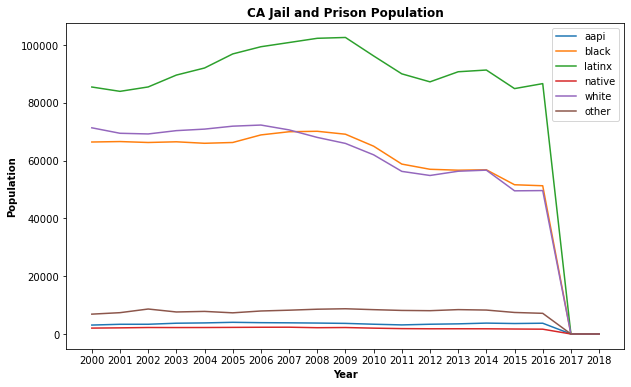

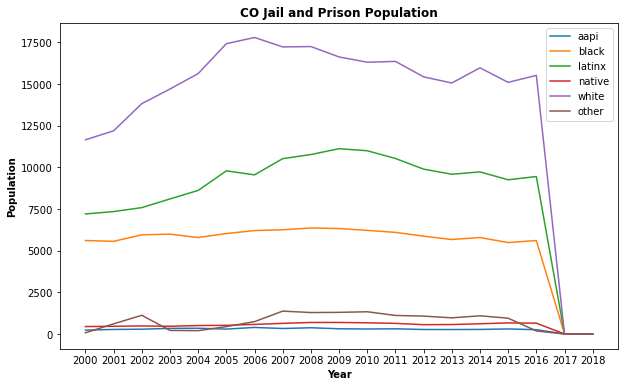

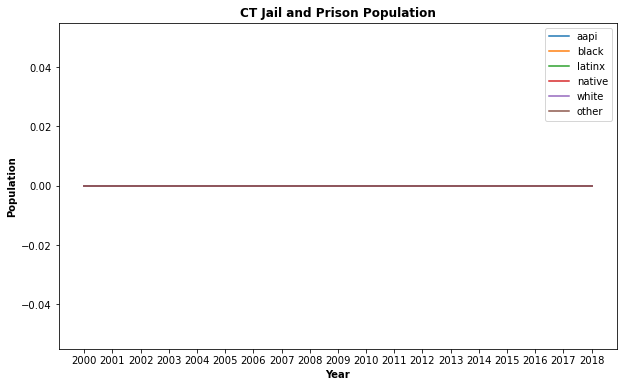

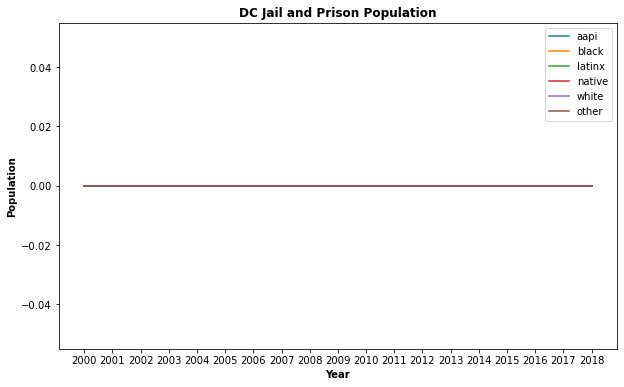

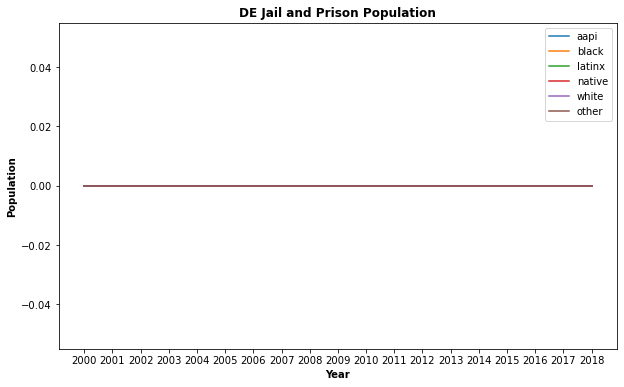

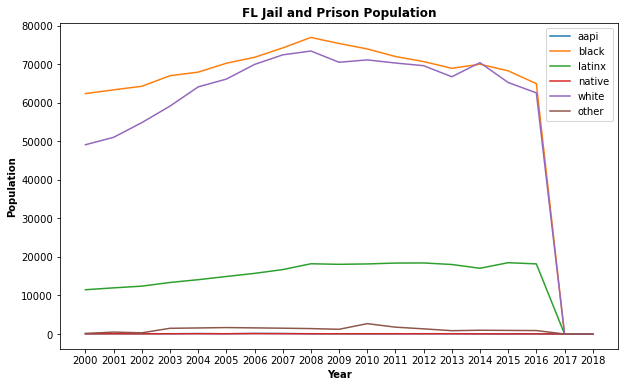

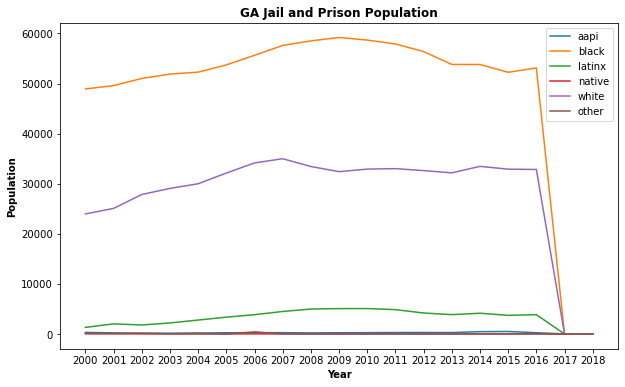

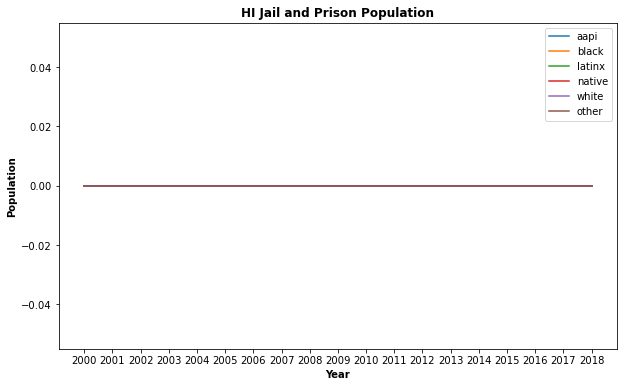

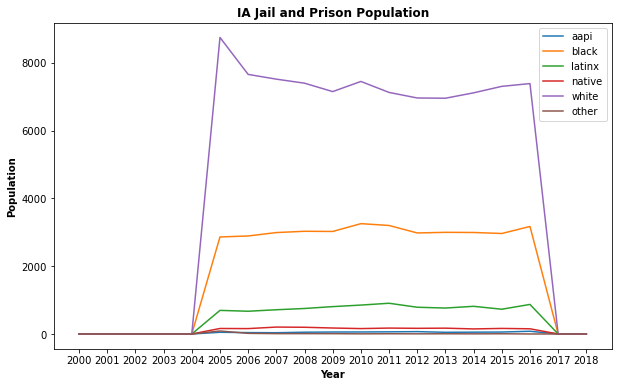

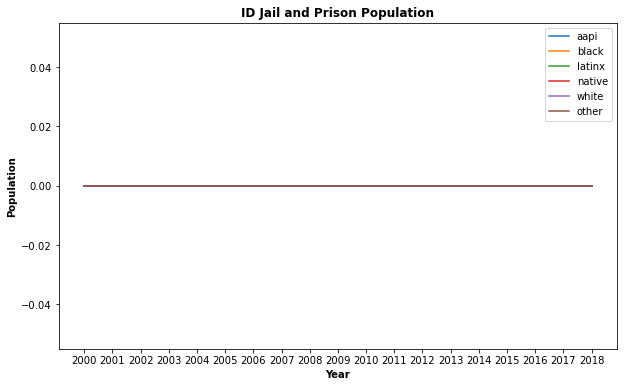

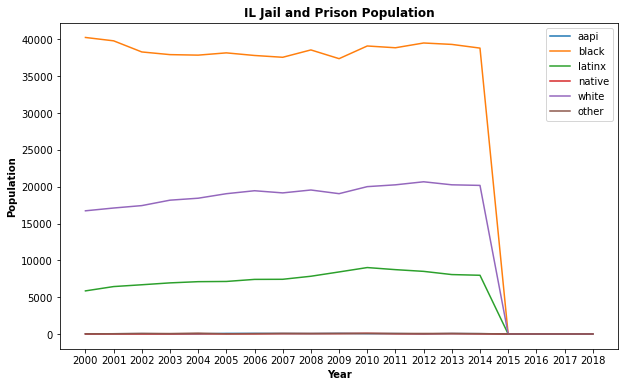

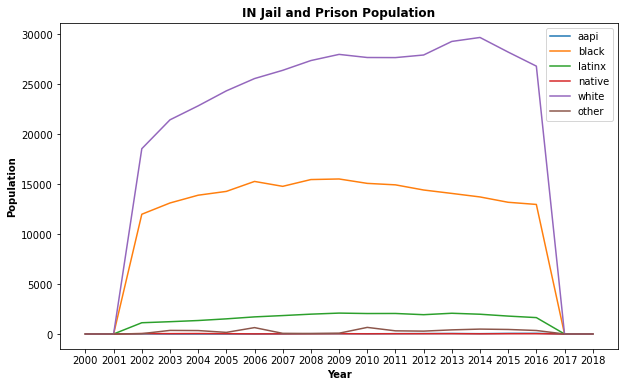

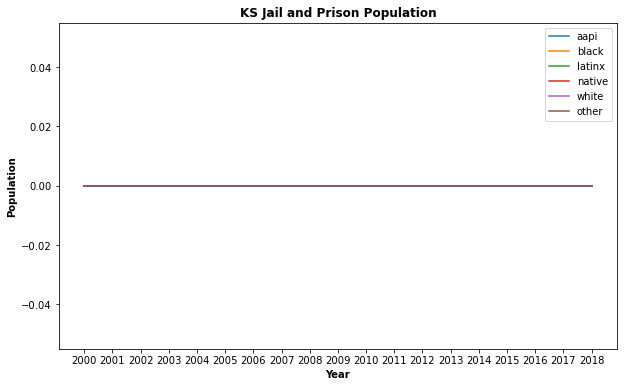

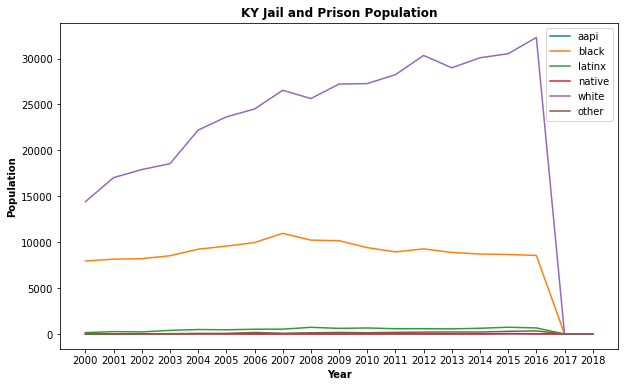

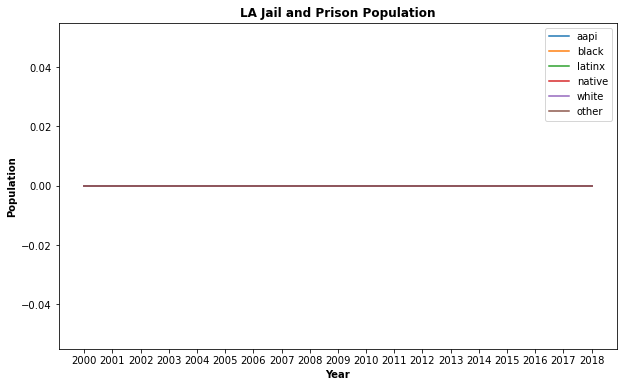

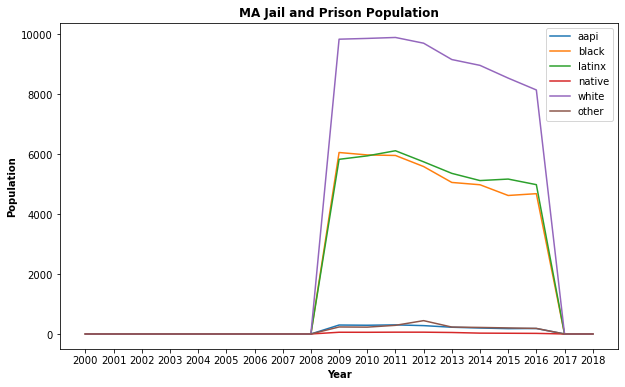

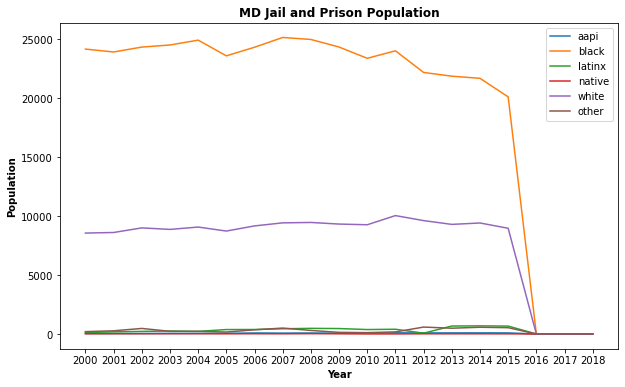

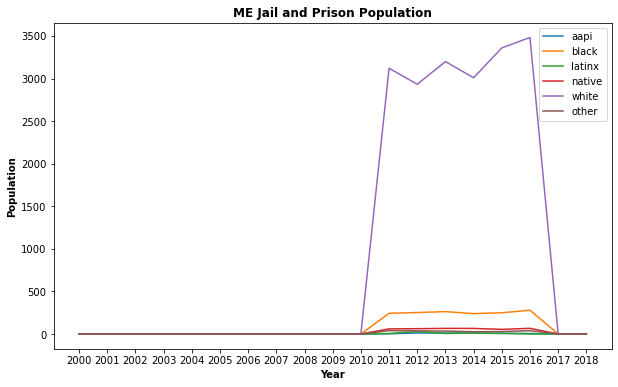

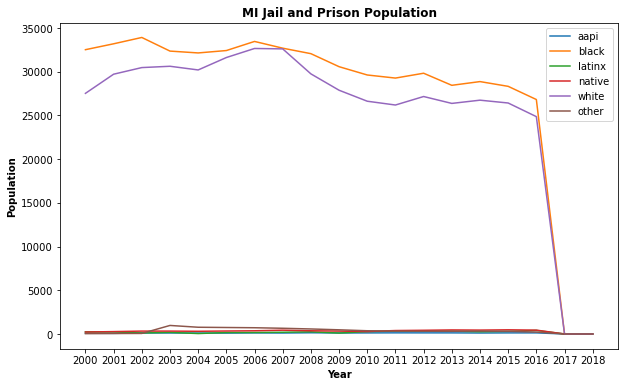

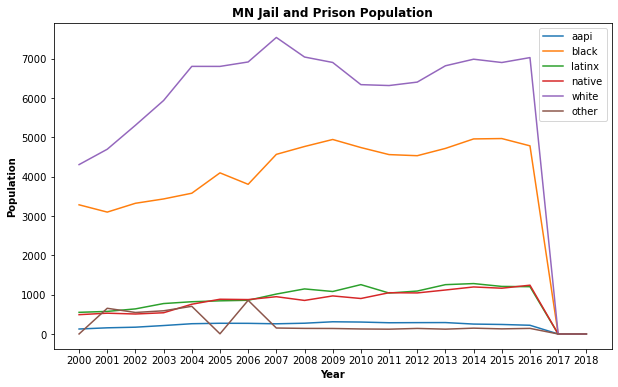

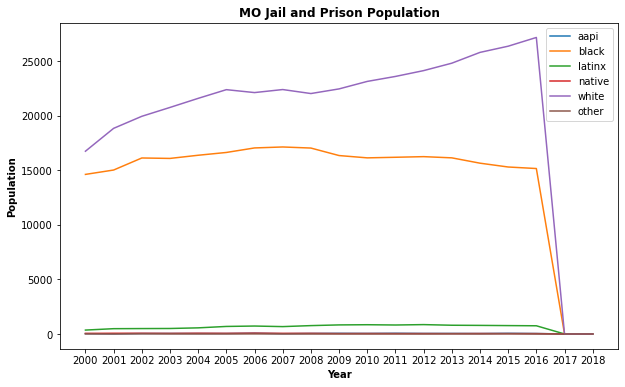

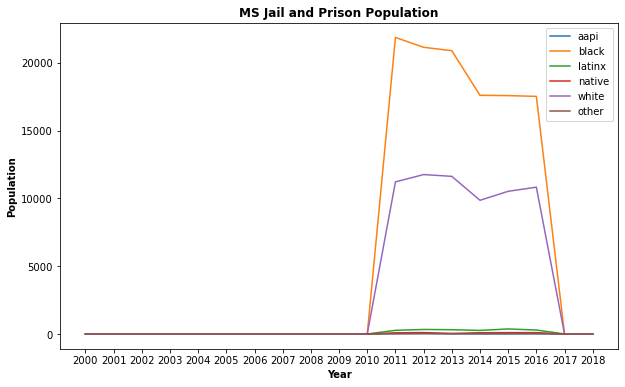

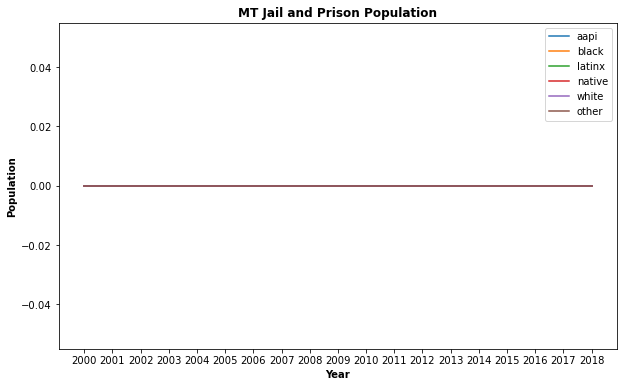

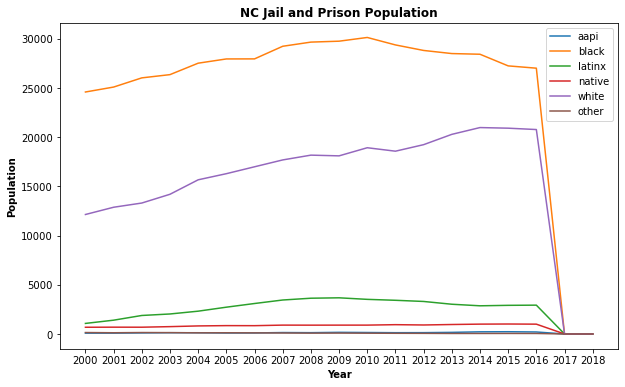

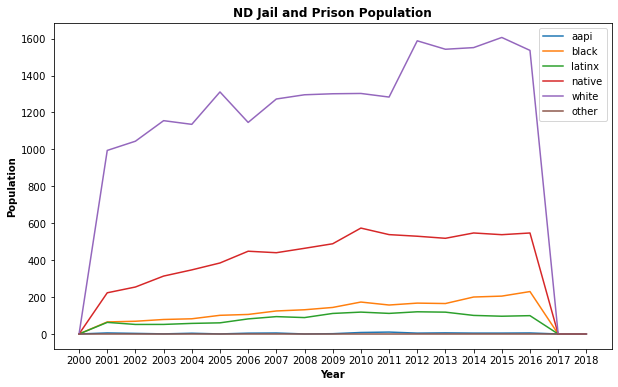

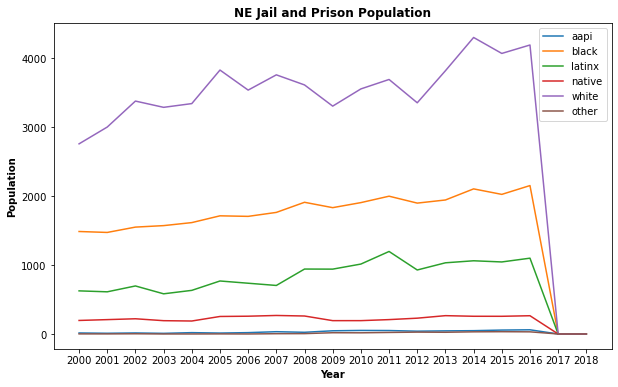

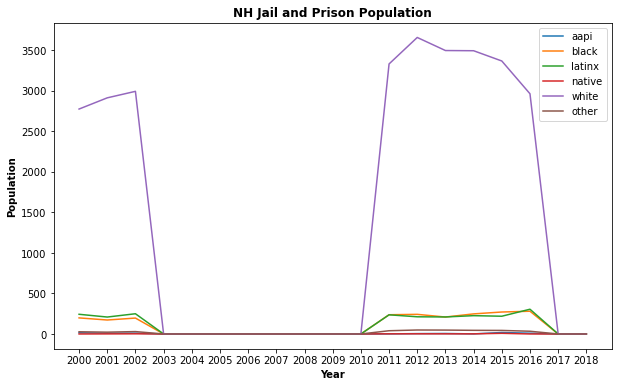

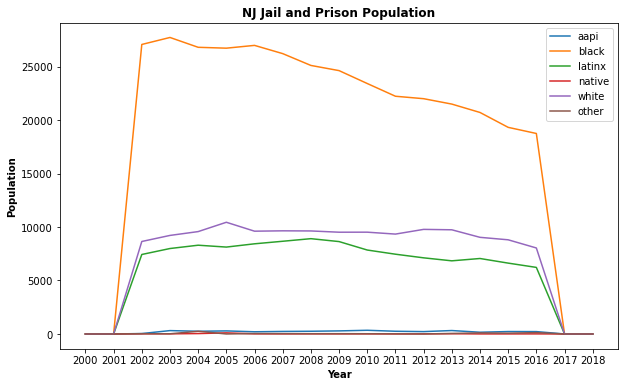

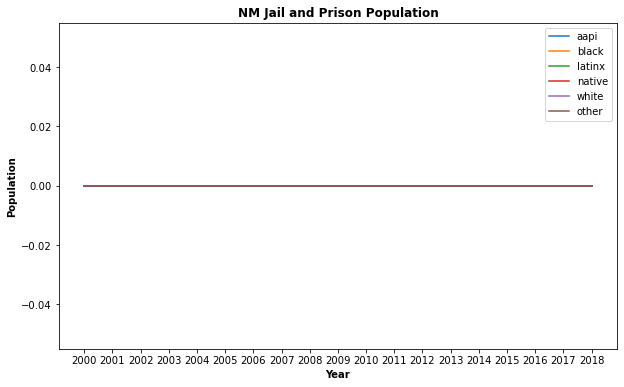

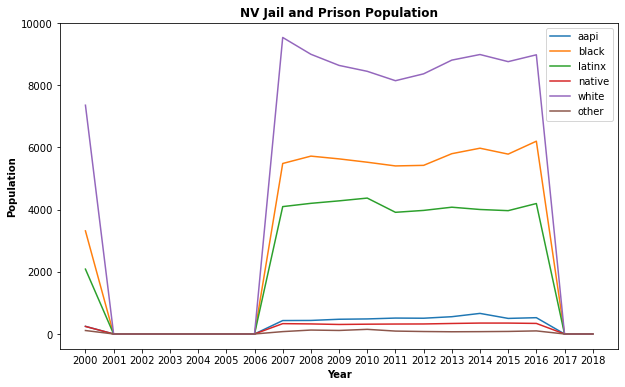

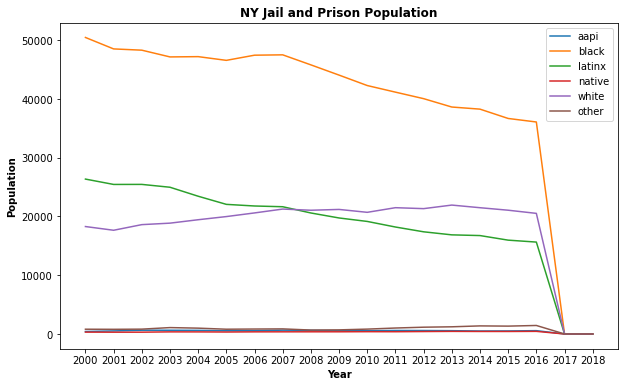

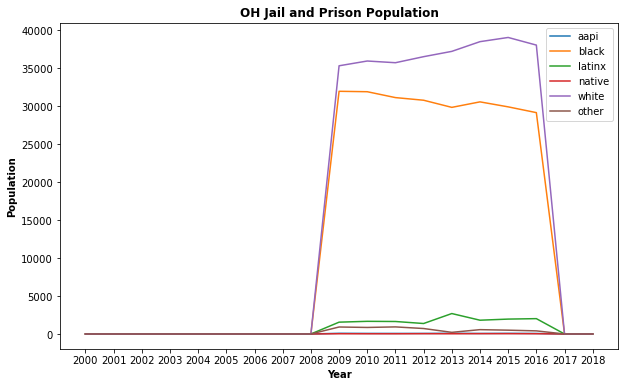

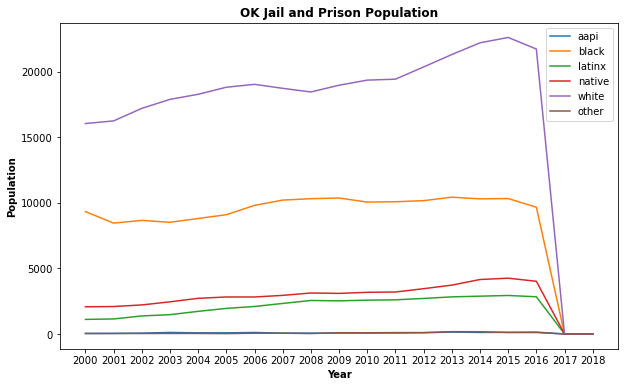

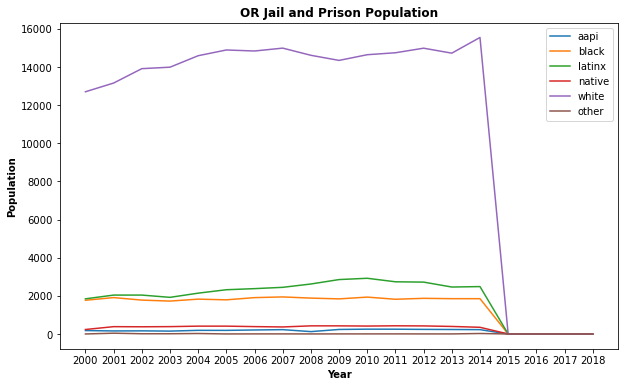

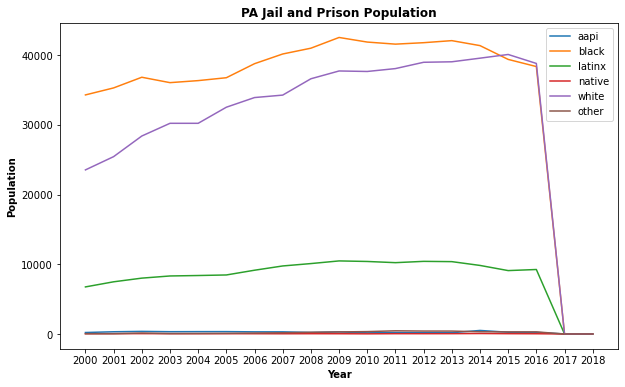

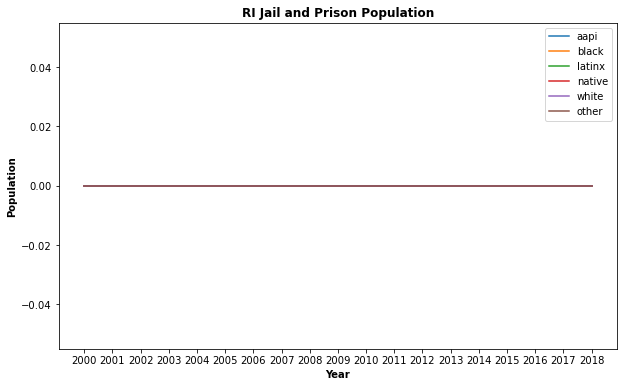

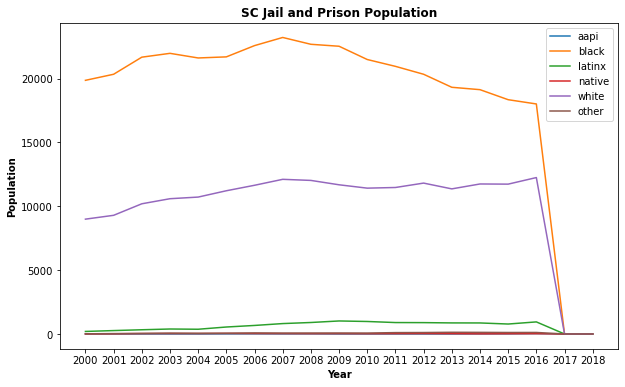

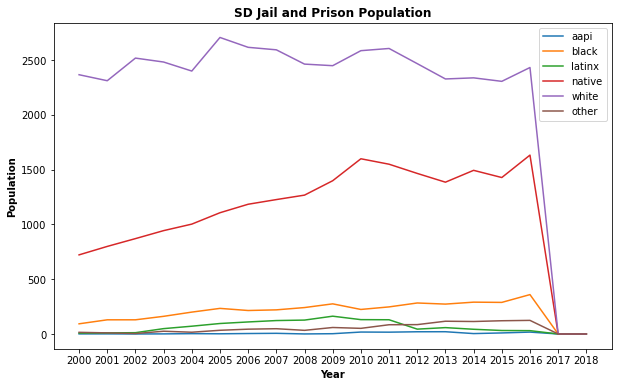

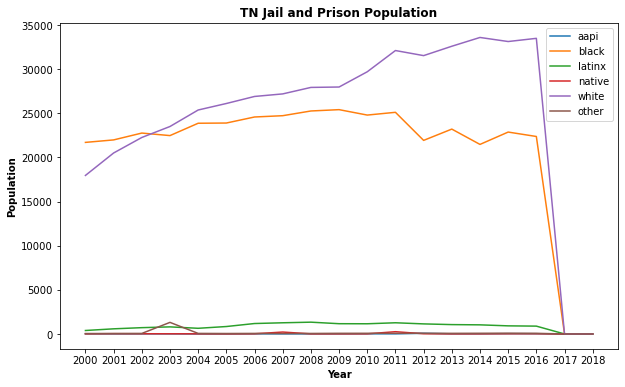

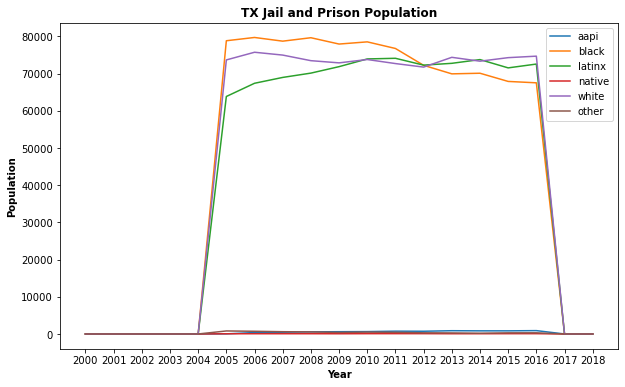

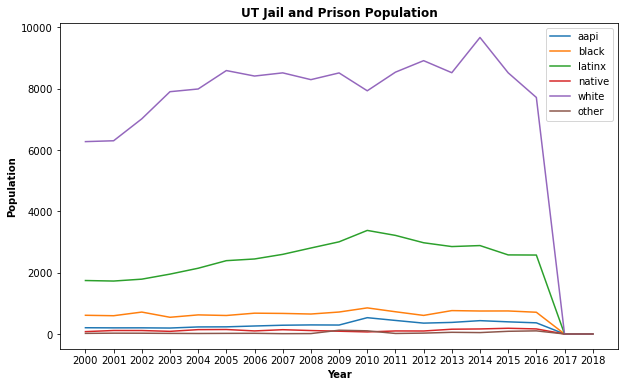

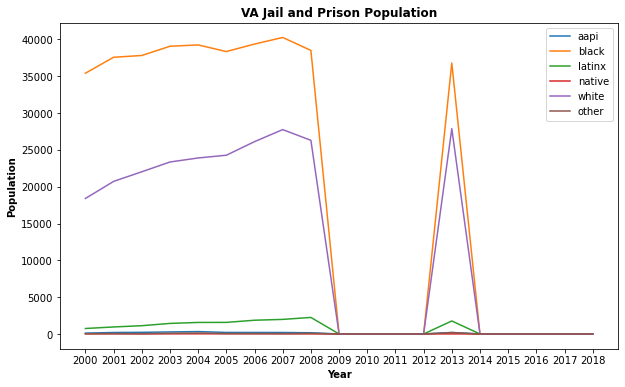

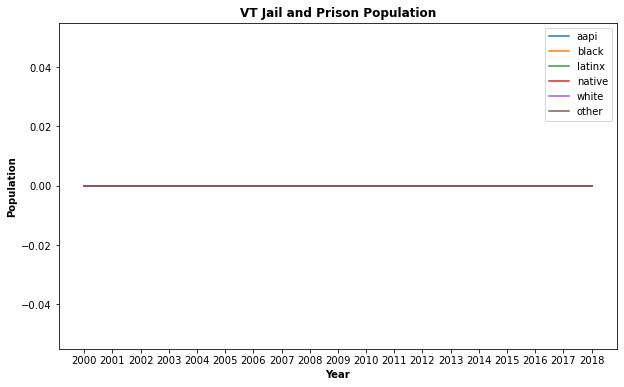

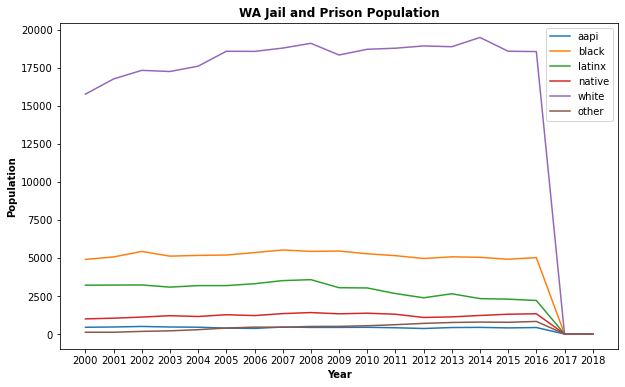

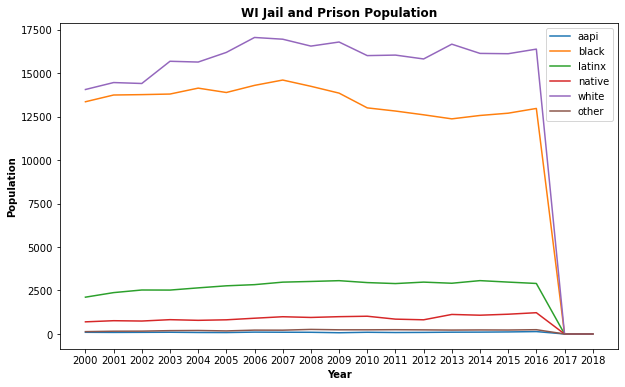

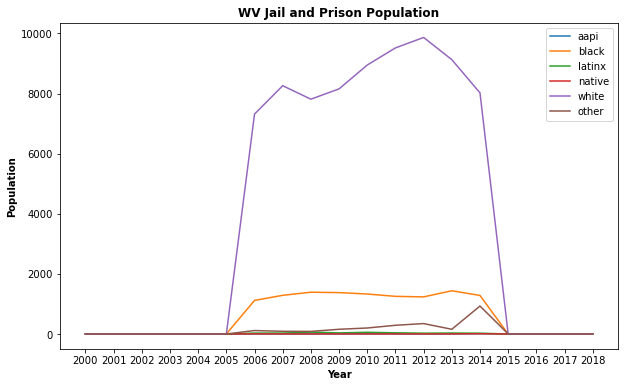

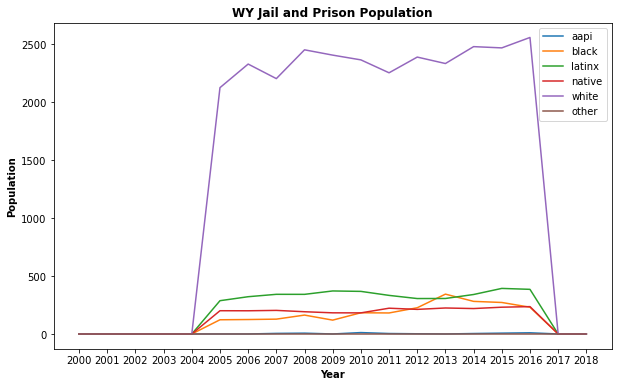

In [31]:
statelineplot('AK')
statelineplot('AL')
statelineplot('AR')
statelineplot('AZ')
statelineplot('CA')
statelineplot('CO')
statelineplot('CT')
statelineplot('DC')
statelineplot('DE')
statelineplot('FL')
statelineplot('GA')
statelineplot('HI')
statelineplot('IA')
statelineplot('ID')
statelineplot('IL')
statelineplot('IN')
statelineplot('KS')
statelineplot('KY')
statelineplot('LA')
statelineplot('MA')
statelineplot('MD')
statelineplot('ME')
statelineplot('MI')
statelineplot('MN')
statelineplot('MO')
statelineplot('MS')
statelineplot('MT')
statelineplot('NC')
statelineplot('ND')
statelineplot('NE')
statelineplot('NH')
statelineplot('NJ')
statelineplot('NM')
statelineplot('NV')
statelineplot('NY')
statelineplot('OH')
statelineplot('OK')
statelineplot('OR')
statelineplot('PA')
statelineplot('RI')
statelineplot('SC')
statelineplot('SD')
statelineplot('TN')
statelineplot('TX')
statelineplot('UT')
statelineplot('VA')
statelineplot('VT')
statelineplot('WA')
statelineplot('WI')
statelineplot('WV')
statelineplot('WY')

<ipython-input-28-df6f466143f5>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,6))


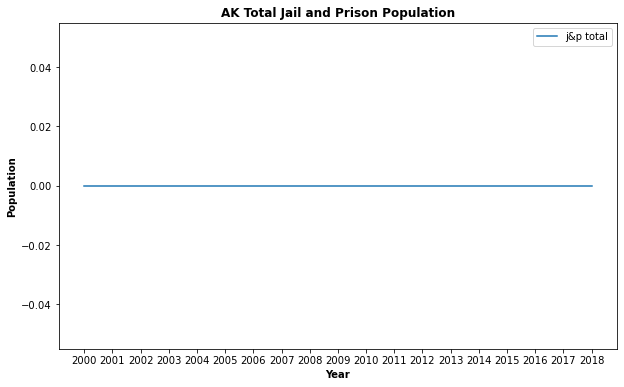

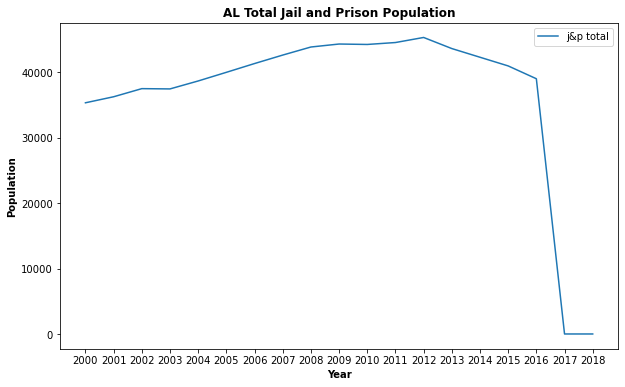

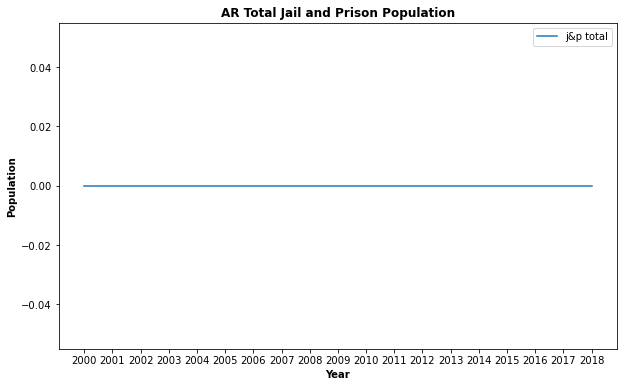

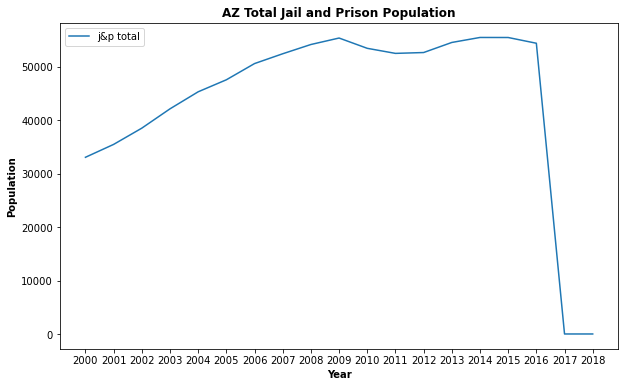

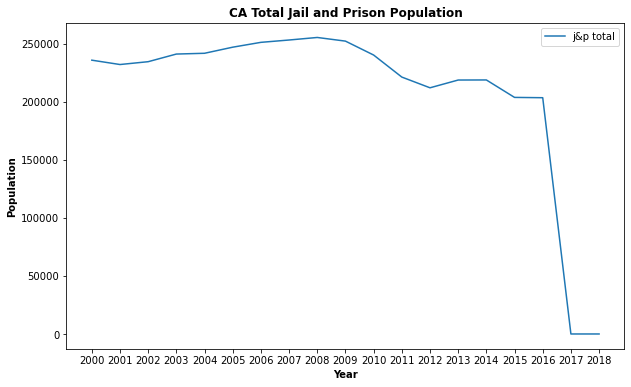

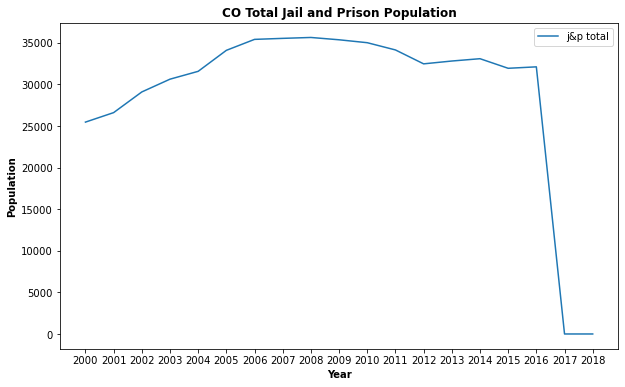

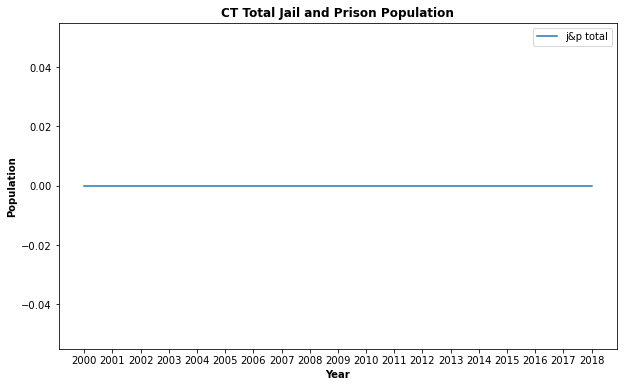

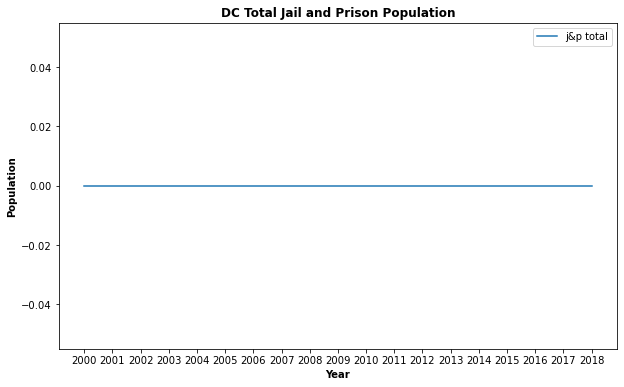

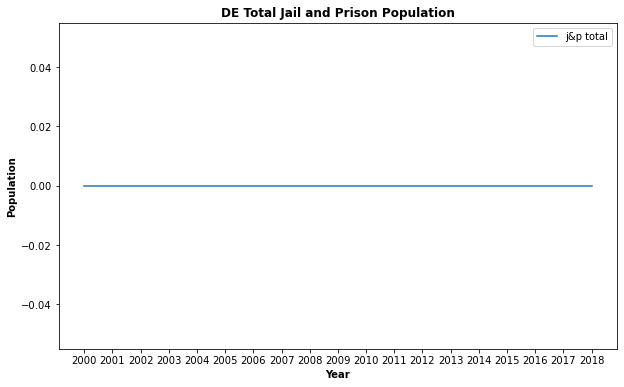

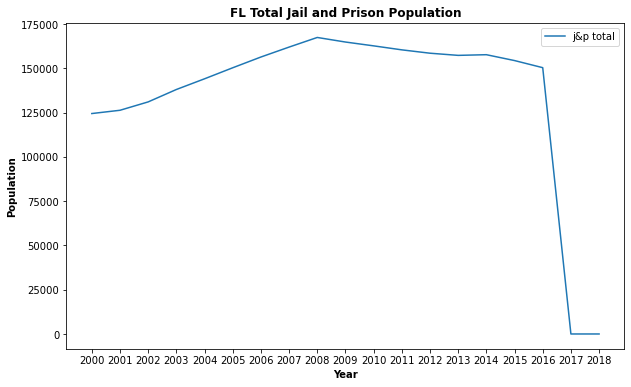

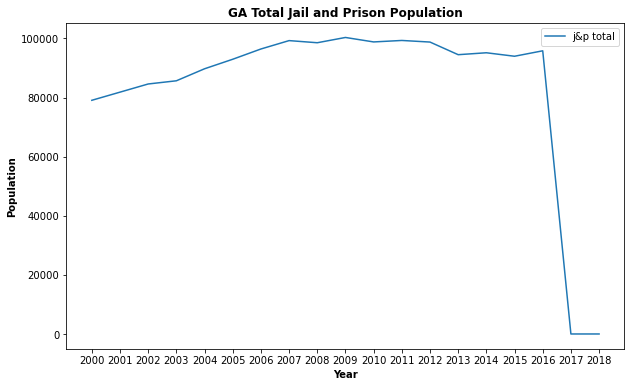

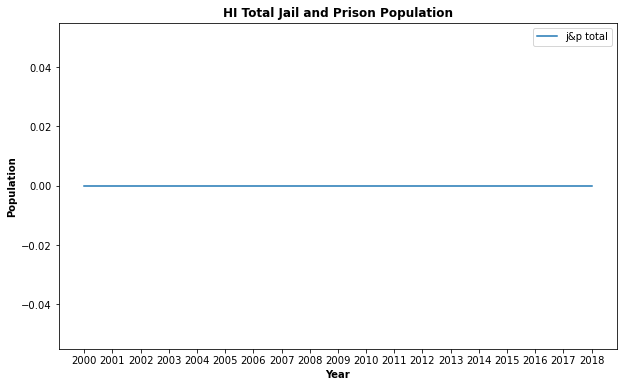

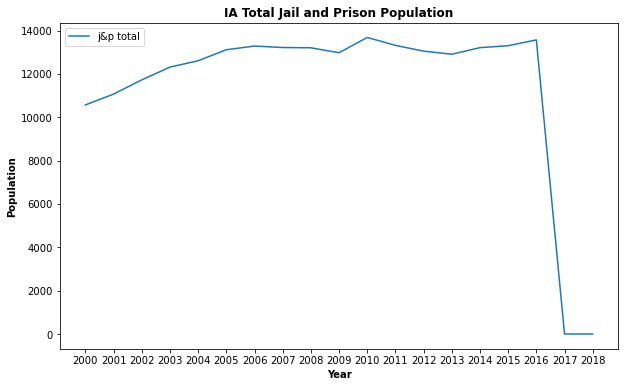

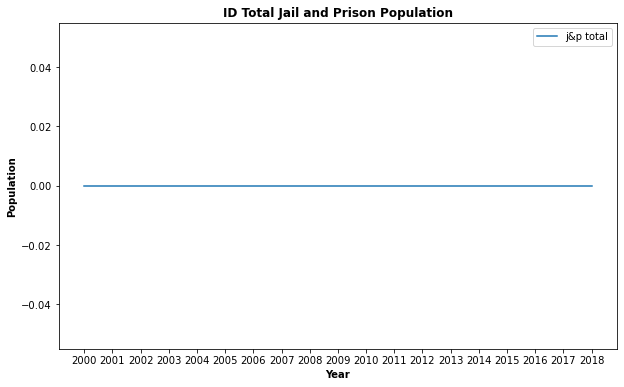

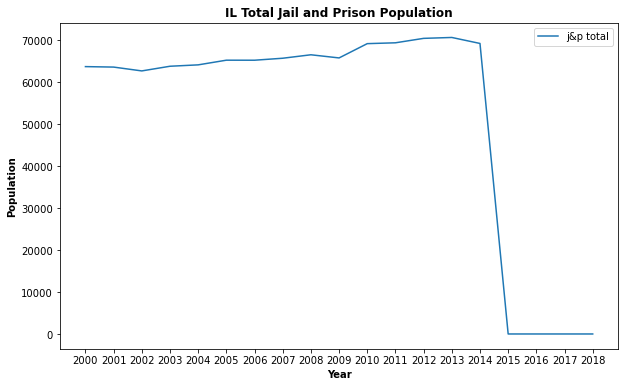

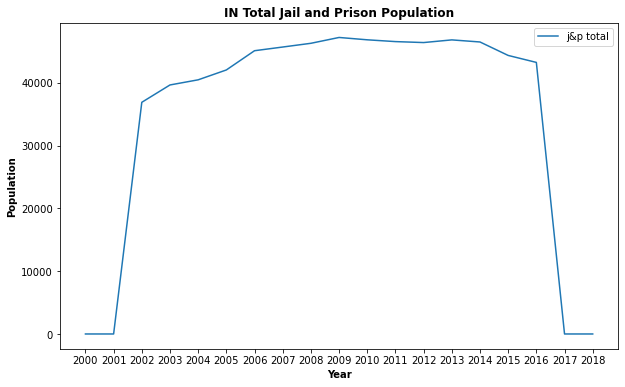

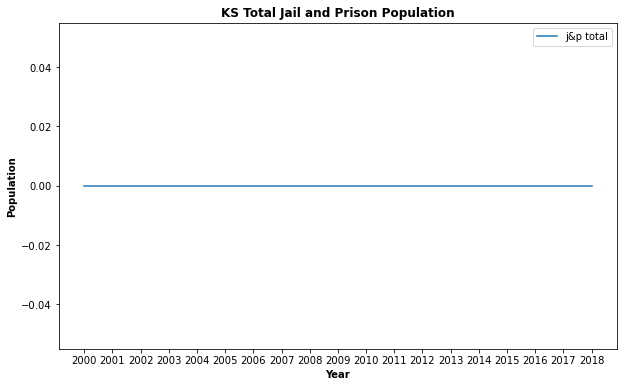

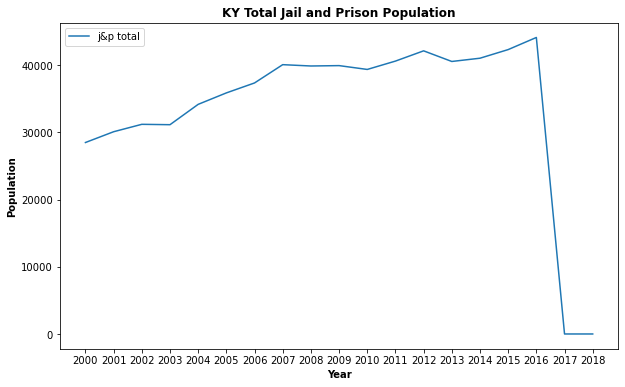

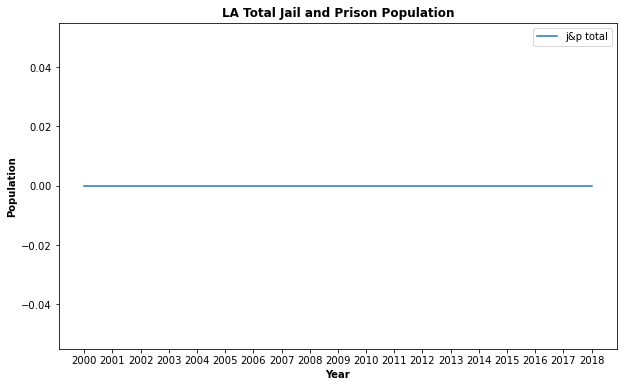

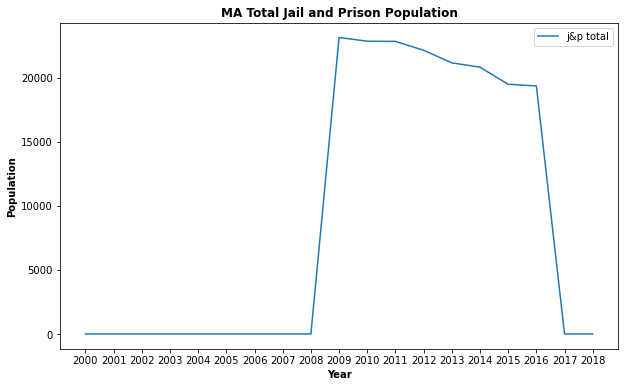

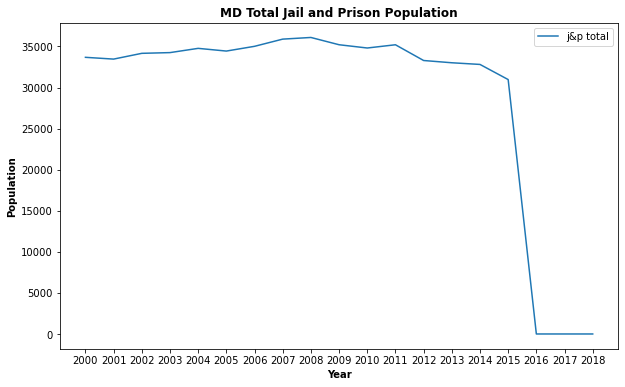

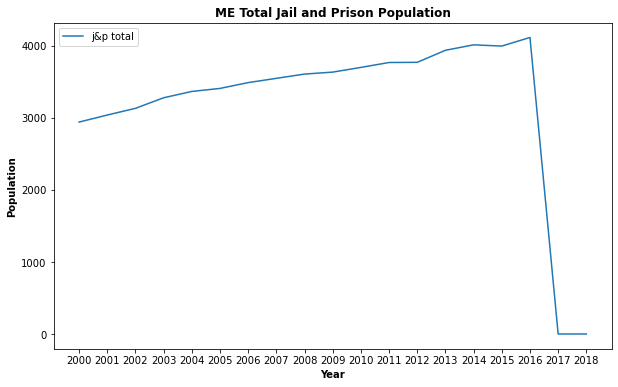

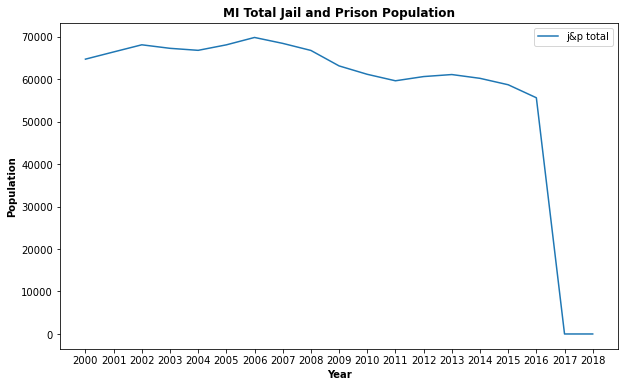

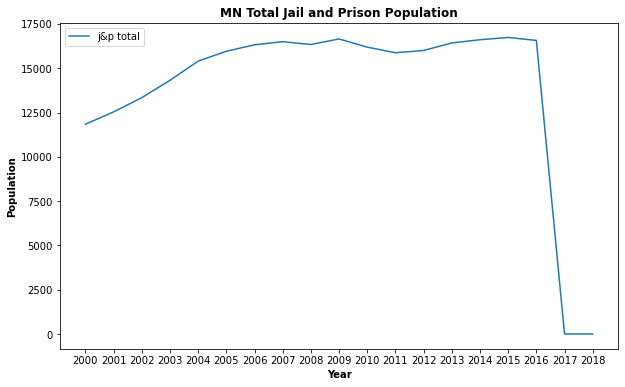

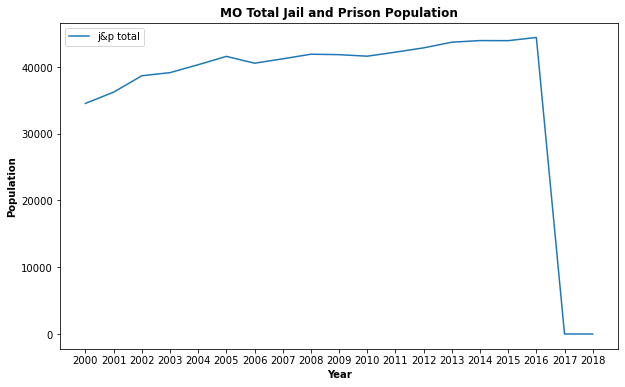

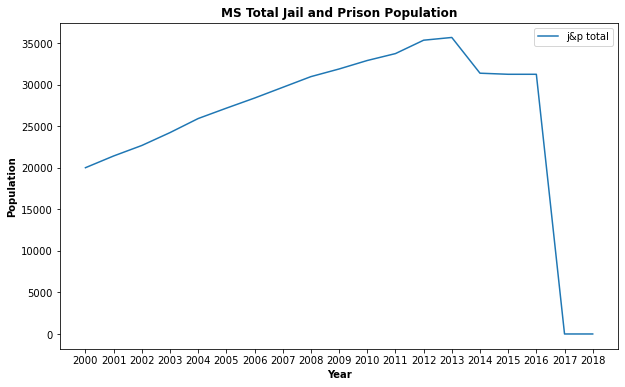

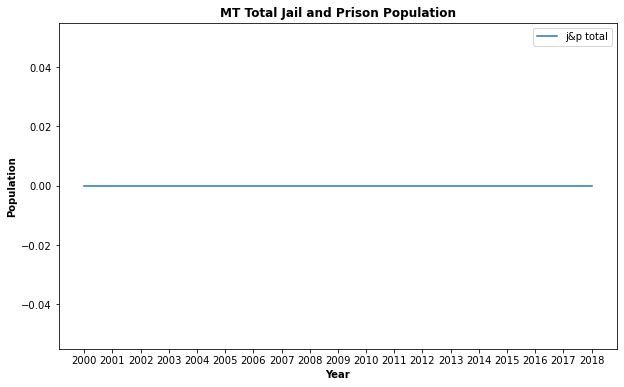

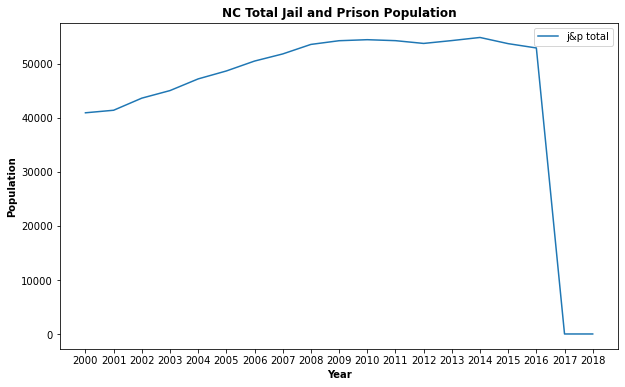

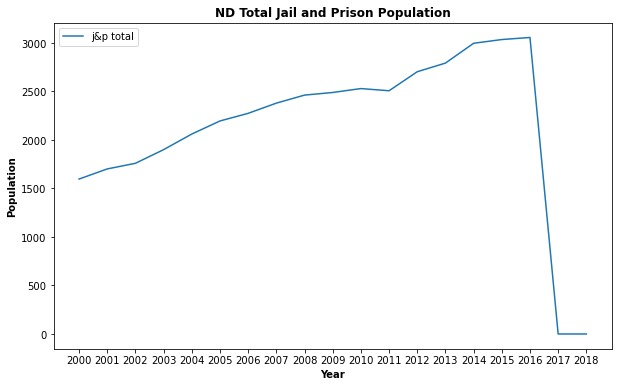

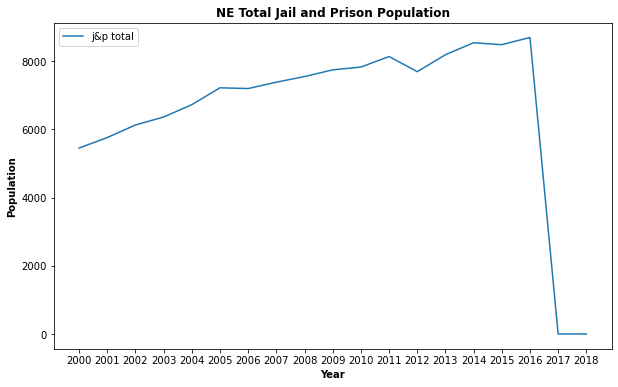

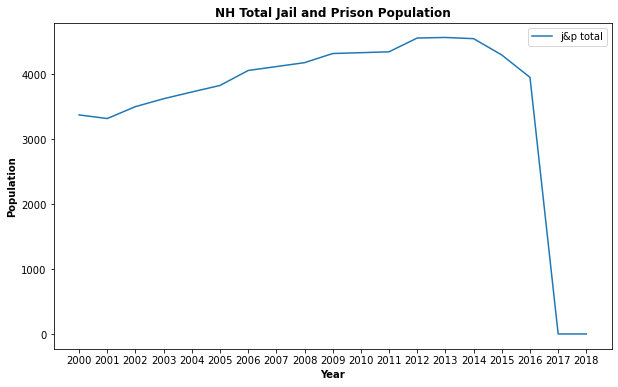

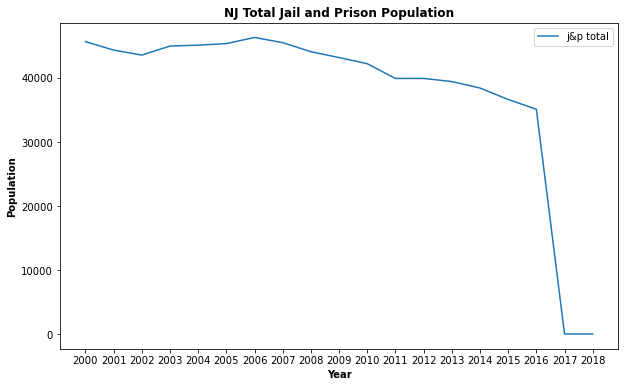

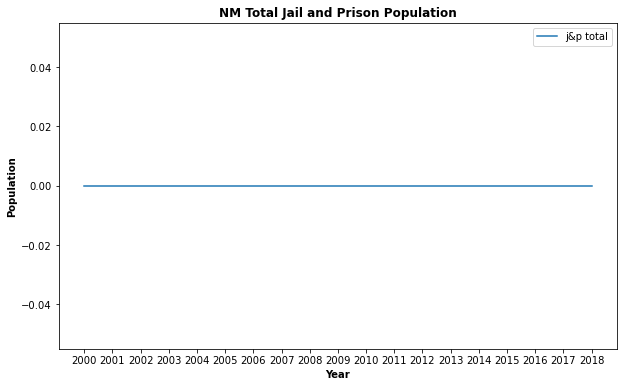

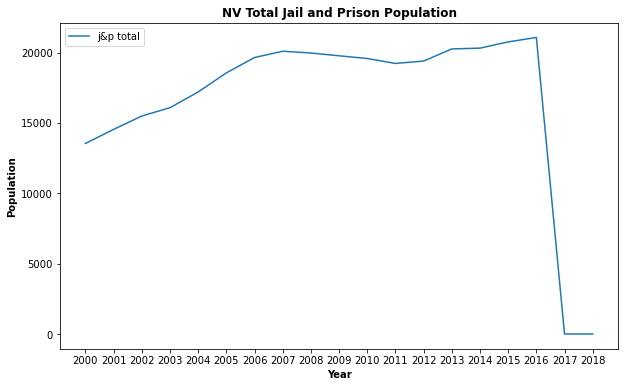

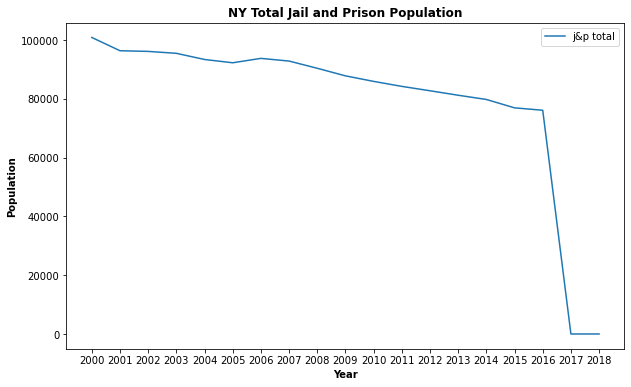

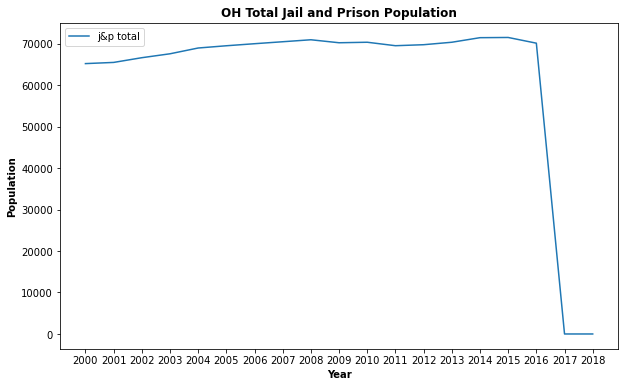

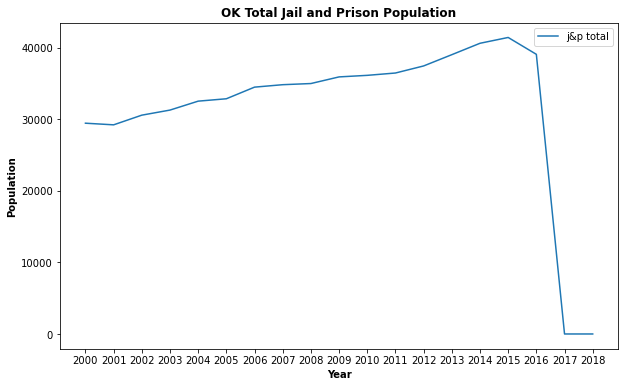

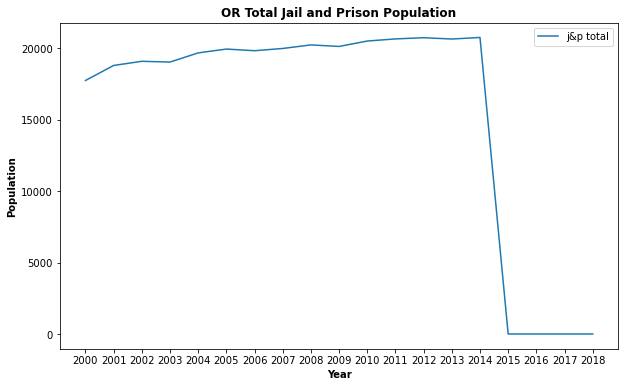

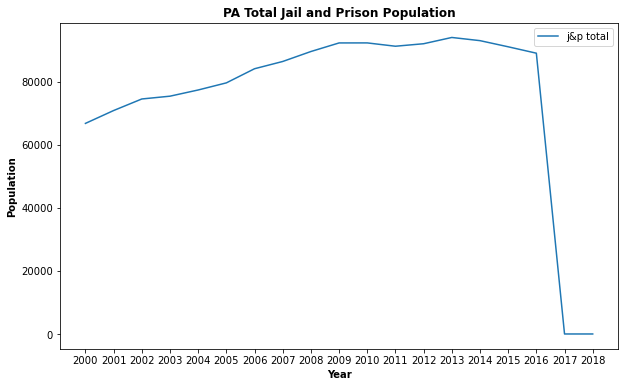

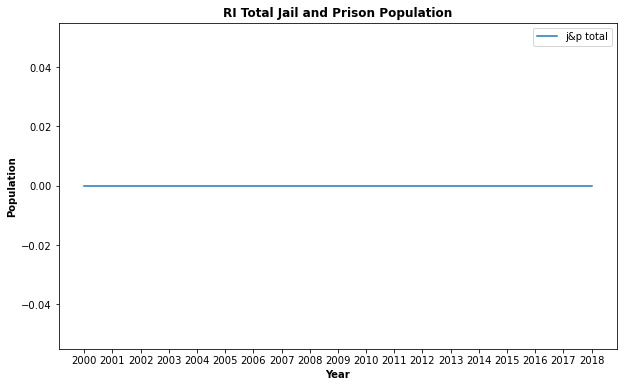

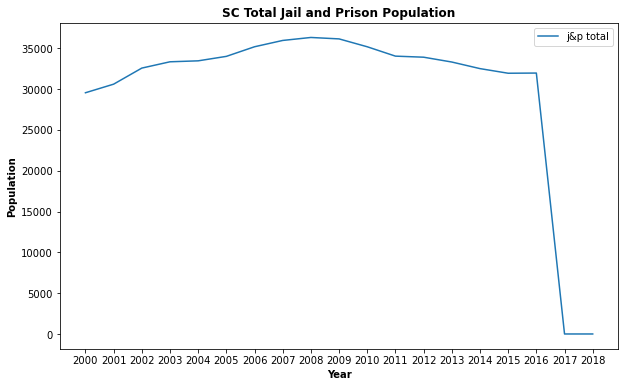

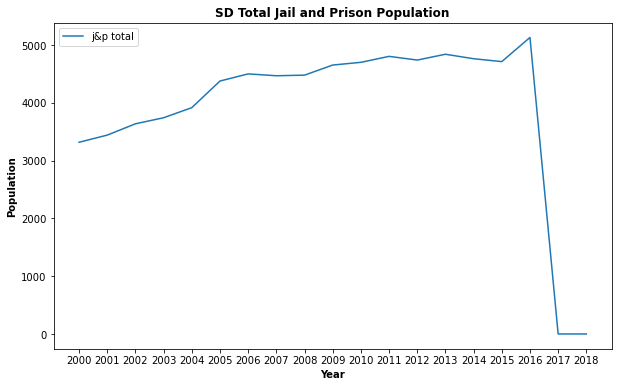

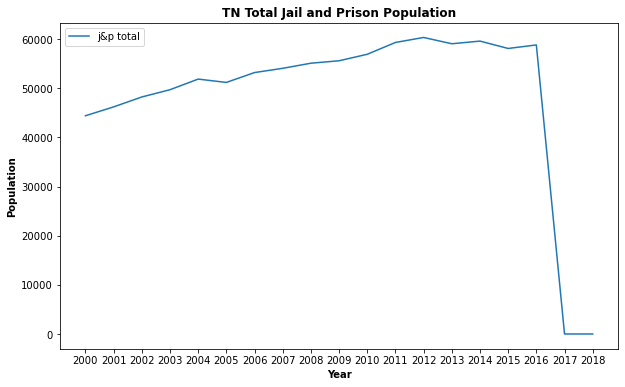

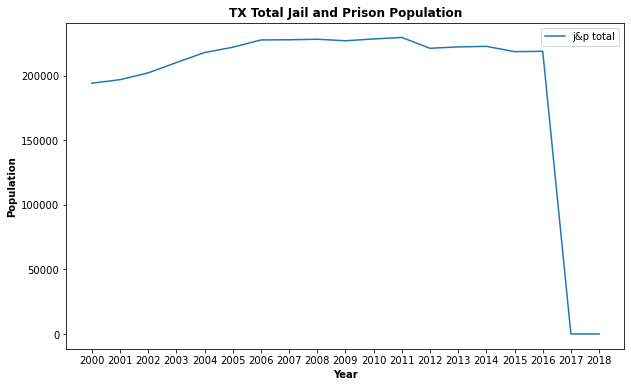

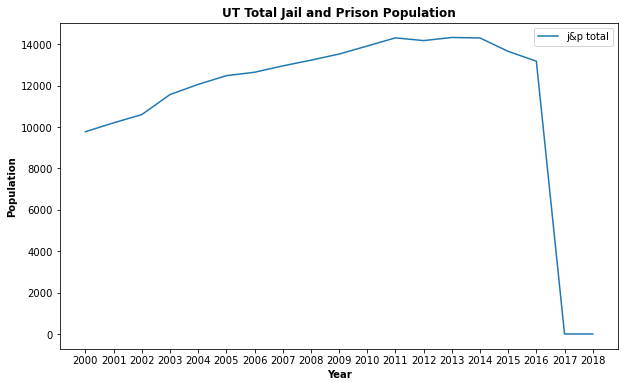

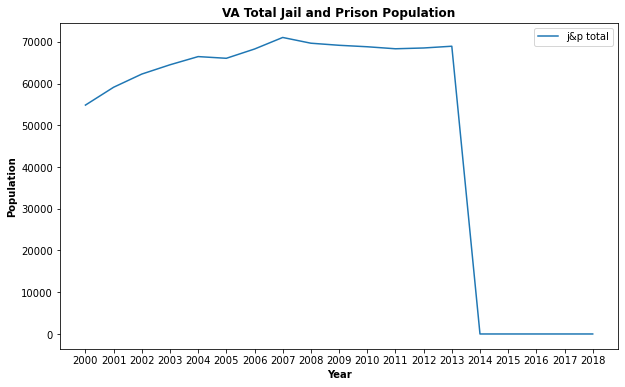

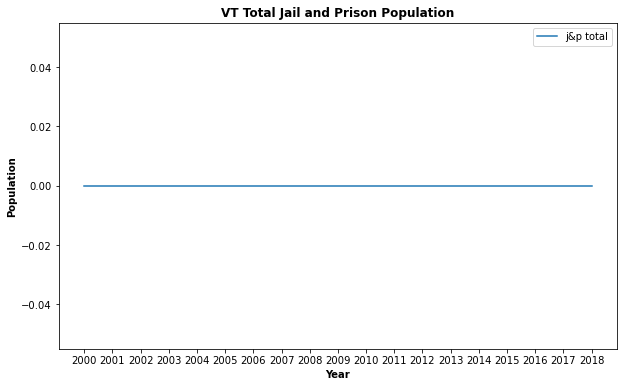

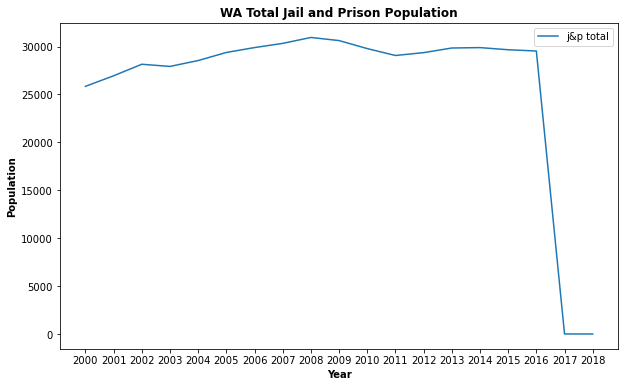

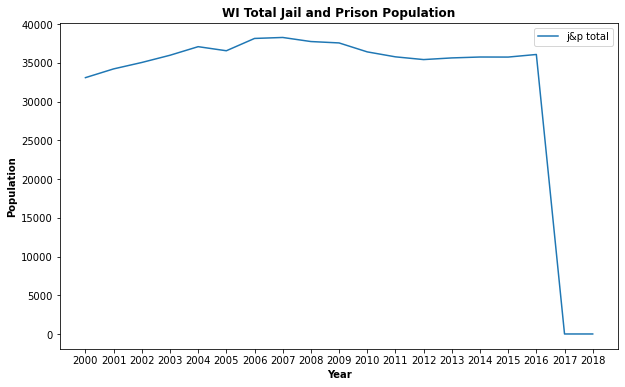

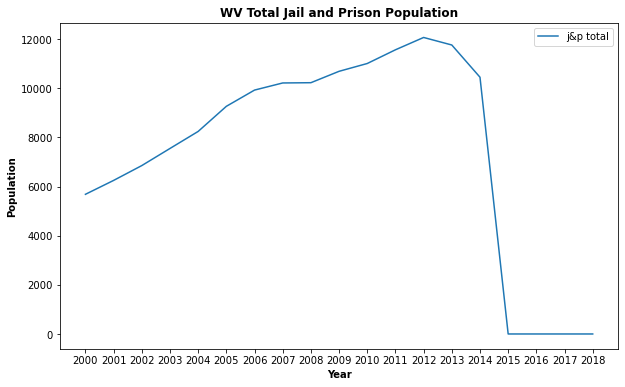

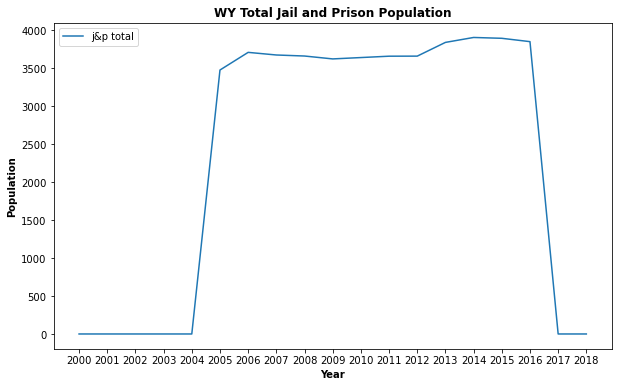

In [32]:
totlineplot('AK')
totlineplot('AL')
totlineplot('AR')
totlineplot('AZ')
totlineplot('CA')
totlineplot('CO')
totlineplot('CT')
totlineplot('DC')
totlineplot('DE')
totlineplot('FL')
totlineplot('GA')
totlineplot('HI')
totlineplot('IA')
totlineplot('ID')
totlineplot('IL')
totlineplot('IN')
totlineplot('KS')
totlineplot('KY')
totlineplot('LA')
totlineplot('MA')
totlineplot('MD')
totlineplot('ME')
totlineplot('MI')
totlineplot('MN')
totlineplot('MO')
totlineplot('MS')
totlineplot('MT')
totlineplot('NC')
totlineplot('ND')
totlineplot('NE')
totlineplot('NH')
totlineplot('NJ')
totlineplot('NM')
totlineplot('NV')
totlineplot('NY')
totlineplot('OH')
totlineplot('OK')
totlineplot('OR')
totlineplot('PA')
totlineplot('RI')
totlineplot('SC')
totlineplot('SD')
totlineplot('TN')
totlineplot('TX')
totlineplot('UT')
totlineplot('VA')
totlineplot('VT')
totlineplot('WA')
totlineplot('WI')
totlineplot('WV')
totlineplot('WY')

In [33]:
# plt.figure(figsize=(20,15))

# labels = year00['division']

# # jail populations
# jail1 = year00['jp_aapi']
# jail2 = year00['jp_black']
# jail3 = year00['jp_latinx']
# jail4 = year00['jp_native']
# jail5 = year00['jp_white']
# jail6 = year00['jp_white']

# # width for multiple bar chart
# width = 0.1

# # graph setup
# plt.xticks(range(len(jail1)), labels)
# plt.xlabel('Division')
# plt.ylabel('Population')
# plt.title('Jail and Prison Populations')

# # side-by-side bars
# plt.bar(np.arange(len(jail1)), jail1, width=width, label='aapi')
# plt.bar(np.arange(len(jail2))+width, jail2, width=width, label='black')
# plt.bar(np.arange(len(jail3))+2*width, jail3, width=width, label='latinx')
# plt.bar(np.arange(len(jail4))+3*width, jail4, width=width, label='native')
# plt.bar(np.arange(len(jail5))+4*width, jail5, width=width, label='white')
# plt.bar(np.arange(len(jail6))+5*width, jail6, width=width, label='other')

# plt.legend(loc='best')

In [34]:
# testing out how to get two plots side by side

# fig = plt.figure(figsize=(10,6))
# coord1 = 121
# coord2 = 122

# labels = year00['division']

# # jail populations
# jail1 = year00['jp_aapi']
# jail2 = year00['jp_black']
# jail3 = year00['jp_latinx']
# jail4 = year00['jp_native']
# jail5 = year00['jp_white']
# jail6 = year00['jp_white']

# # width for multiple bar chart
# width = 0.1

# # graph setup
# plt.xticks(range(len(jail1)), labels)
# plt.xlabel('Division')
# plt.ylabel('Population')
# plt.title('Jail Populations')

# # side-by-side bars
# plt.bar(np.arange(len(jail1)), jail1, width=width, label='aapi')
# plt.bar(np.arange(len(jail2))+width, jail2, width=width, label='black')
# plt.bar(np.arange(len(jail3))+2*width, jail3, width=width, label='latinx')
# plt.bar(np.arange(len(jail4))+3*width, jail4, width=width, label='native')
# plt.bar(np.arange(len(jail5))+4*width, jail5, width=width, label='white')
# plt.bar(np.arange(len(jail6))+5*width, jail6, width=width, label='other')

# plt.legend(loc='best')

In [35]:
# 3d Plot

# fig = plt.figure(figsize=(20,15))
# ax = plt.axes(projection="3d")

# labels = year00['division']
# types = ['Jail', 'Prison', 'Population']

# plt.xticks(range(6), labels)
# plt.xlabel('Division')
# plt.ylabel('Population')
# plt.title('2000 Populations')

# plt.show()

In [36]:
#totlineplot('IA')

In [37]:
#statelineplot('VA')

In [38]:
# # number of variable
# categories=list(year00)[1:]
# N = len(categories)
# print(categories)

In [39]:
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:

# values1=year00.loc[0].drop('division').values.flatten().tolist()
# values1 += values1[:1]

# values2=year00.loc[1].drop('division').values.flatten().tolist()
# values2 += values2[:1]

# values3=year00.loc[2].drop('division').values.flatten().tolist()
# values3 += values3[:1]

# values4=year00.loc[3].drop('division').values.flatten().tolist()
# values4 += values4[:1]

# values5=year00.loc[4].drop('division').values.flatten().tolist()
# values5 += values5[:1]

# values6=year00.loc[5].drop('division').values.flatten().tolist()
# values6 += values6[:1]

# values7=year00.loc[6].drop('division').values.flatten().tolist()
# values7 += values7[:1]

# values8=year00.loc[7].drop('division').values.flatten().tolist()
# values8 += values8[:1]

# values9=year00.loc[8].drop('division').values.flatten().tolist()
# values9 += values9[:1]

In [40]:
# # this can stay as-is
# # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
# angles = [n / float(N) * 2 * pi for n in range(N)]
# angles += angles[:1]

In [41]:
# # Initialise the spider plot
# plt.figure(figsize=(50,50))
# ax = plt.subplot(111, polar=True)

# # Draw one axe per variable + add labels labels yet
# plt.xticks(angles[:-1], categories, color='grey', size=8)

# # Draw ylabels
# ax.set_rlabel_position(0)
# plt.yticks([10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000], 
#            ['10000', '20000', '30000', '40000', '50000', '60000', '70000', '80000'], color="grey", size=7)
# plt.ylim(0,90000)

# # Plot data
# ax.plot(angles, values1, linewidth=1, linestyle='solid')
# ax.plot(angles, values2, linewidth=1, linestyle='solid')
# ax.plot(angles, values3, linewidth=1, linestyle='solid')
# ax.plot(angles, values4, linewidth=1, linestyle='solid')
# ax.plot(angles, values5, linewidth=1, linestyle='solid')
# ax.plot(angles, values6, linewidth=1, linestyle='solid')
# ax.plot(angles, values7, linewidth=1, linestyle='solid')
# ax.plot(angles, values8, linewidth=1, linestyle='solid')
# ax.plot(angles, values9, linewidth=1, linestyle='solid')

# Fill area
# ax.fill(angles, values, 'b', alpha=0.1)
